# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

### <font color="red">**Data Problem Definition**
<font color="blue">The business problem of identifying key drivers for used car prices can be reframed as a data problem:<br>
<font color="blue">Given a dataset of used cars with various features (e.g., make, model, year, mileage, condition), build a regression model to predict the price of a used car based on these features. <br>
<font color="blue">The goal is to identify which features have the most significant impact on the predicted price, thereby revealing the key drivers of used car prices.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### <font color="red">**Steps for Data Understanding and Quality Assessment:**
<font color="blue">1. Load the dataset and display the first few rows to get a sense of the data structure and content.<br>
<font color="blue">2. Check the data types of each column to ensure they are appropriate for analysis.<br>
<font color="blue">3. Get a summary of the dataset, including the number of rows and columns, and non-null values.<br>
<font color="blue"> 4. Check for missing values in each column and visualize the missing data pattern.<br>
<font color="blue"> 5. Calculate descriptive statistics for numerical columns (mean, median, standard deviation, min, max, etc.).<br>
<font color="blue"> 6. Explore the distribution of categorical variables using value counts and visualizations (e.g., bar plots).<br>
<font color="blue"> 7. Identify potential outliers in numerical columns using visualizations (e.g., box plots, histograms).<br>
<font color="blue"> 8. Analyze the relationships between variables using correlation matrices and scatter plots.<br>
<font color="blue"> 9. Understand the meaning of each feature and how it relates to the target variable (price).<br>
<font color="blue"> 10. Document any observations, assumptions, and potential issues found during the exploration.<br>

In [2]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from IPython.display import display
import matplotlib.pyplot as plt

from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
# Load the dataset
df = pd.read_csv('data/vehicles.csv')

# Display the first few rows
display(df.head())

target = 'price'
features = [i for i in df.columns if i not in [target]]

original_df = df.copy(deep=True)

id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2  NaN  NaN         NaN    fl  
3  NaN  NaN         NaN    ma  
4  NaN  NaN         NaN    nc

In [4]:
# Check the data type of each column
display(df.info())
# There are many null fields in the dataset and most of the columns are categorical with "object" data type that implies using one-hot encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

None

In [5]:
#Check number of unique rows in each feature
df.nunique().sort_values()

drive                3
transmission         3
size                 4
fuel                 5
condition            6
title_status         6
cylinders            8
paint_color         12
type                13
manufacturer        42
state               51
year               114
region             404
price            15655
model            29649
odometer        104870
VIN             118246
id              426880
dtype: int64

In [6]:
#  Calculate descriptive statistics for numerical columns
display(df.describe())
# Clearly the price and odometer features contain outliers as shown in the maximum and minimum values

id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07

In [7]:
# Check the number of numerical and categorical features
numerical_features = df.select_dtypes(include=np.number).columns
categorical_features = df.select_dtypes(include='object').columns

print(f"Number of numerical features: {len(numerical_features)}")
print(f"Number of categorical features: {len(categorical_features)}")

Number of numerical features: 4
Number of categorical features: 14


In [8]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
display(f"Number of duplicate rows in the dataset: {duplicate_rows}")

'Number of duplicate rows in the dataset: 0'

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

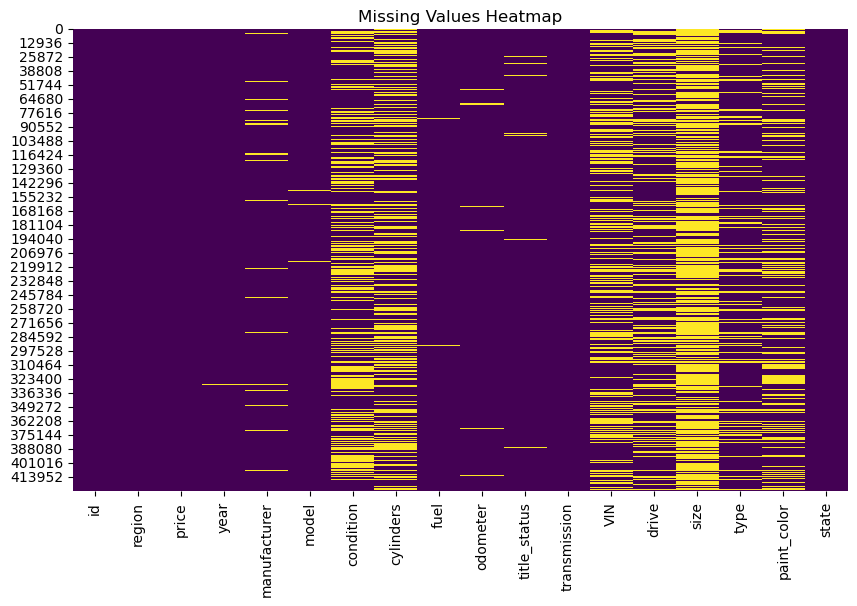

In [9]:
# Check for missing values in each column and visualize the missing data pattern.
missing_values = df.isnull().sum()
display(missing_values)

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

<font color="blue">**Visualize data distributions:** <font color="red">Create histograms for numerical features and bar plots for categorical features to understand their distributions and identify potential outliers or anomalies.

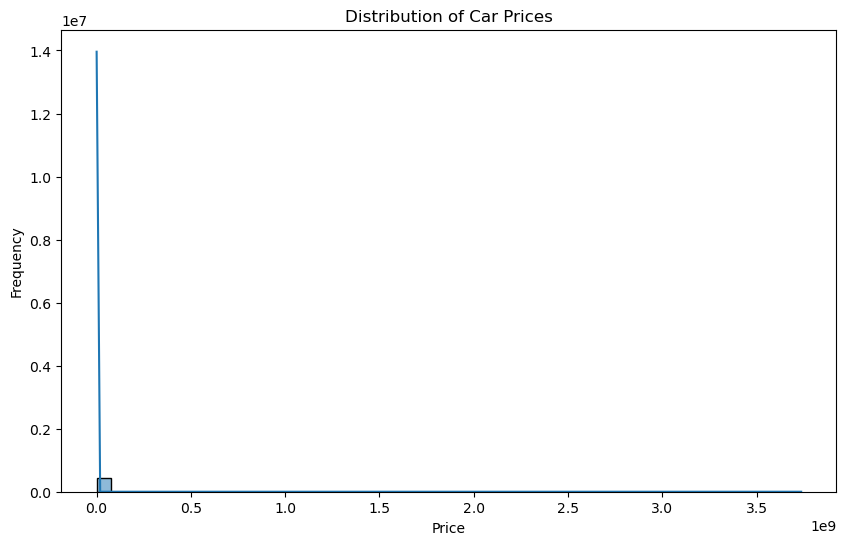

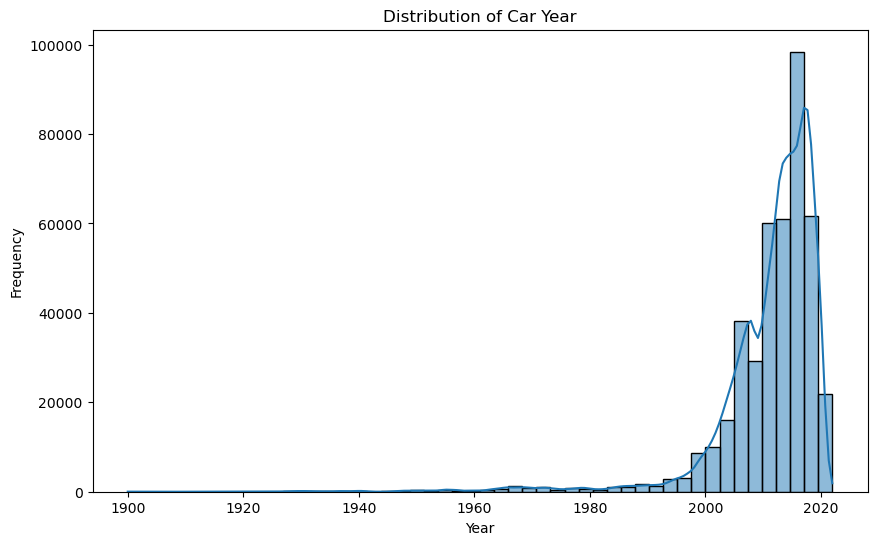

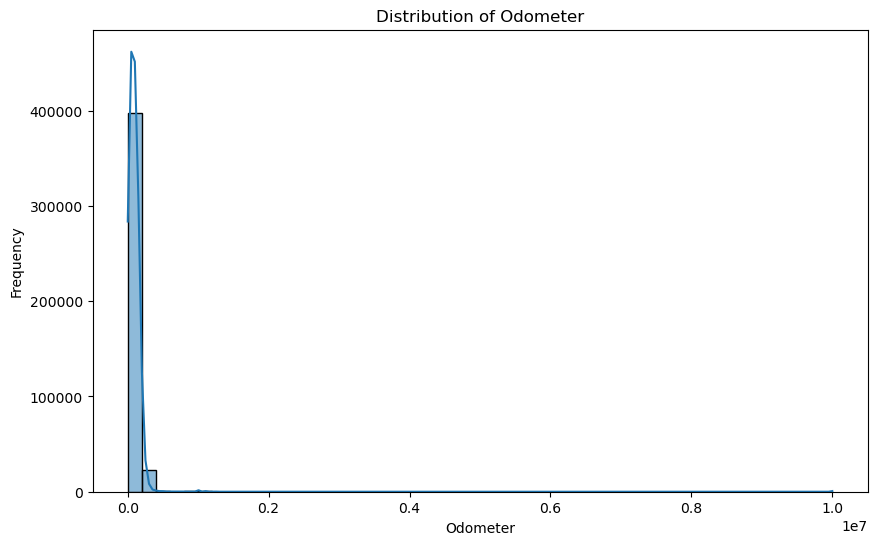

In [10]:
# Plot the distribution of the 'price', 'year', and 'odometer numerical feature
# Result show that there are outliers in these numerical features

# Histogram of the 'price' column
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Histogram of the 'year' column
# From below data, its clear that there aren't many cars before 1960
plt.figure(figsize=(10, 6))
sns.histplot(df['year'], bins=50, kde=True)
plt.title('Distribution of Car Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

# Histogram of the 'odometer' column
plt.figure(figsize=(10, 6))
sns.histplot(df['odometer'], bins=50, kde=True)
plt.title('Distribution of Odometer')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()

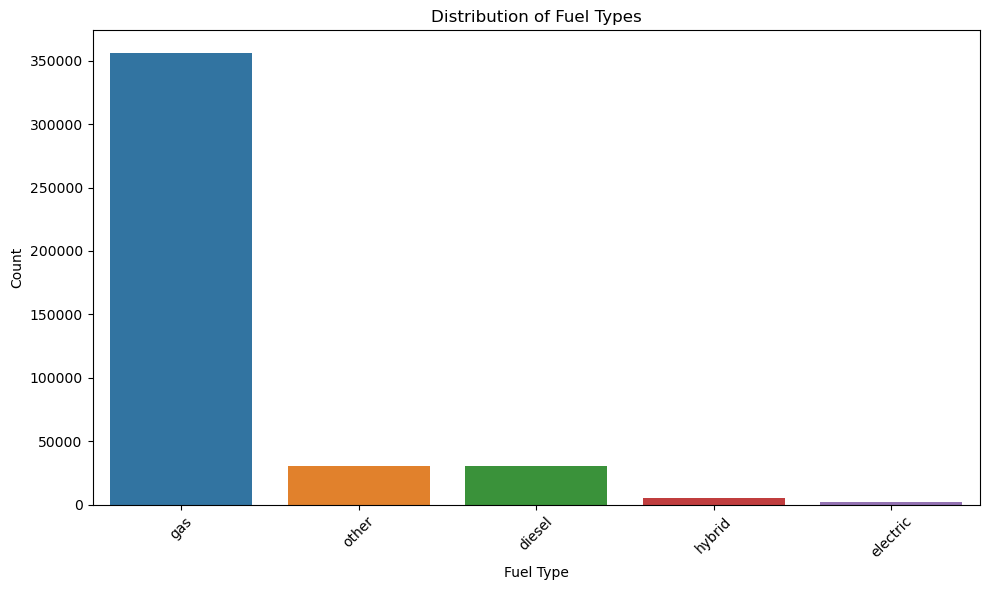

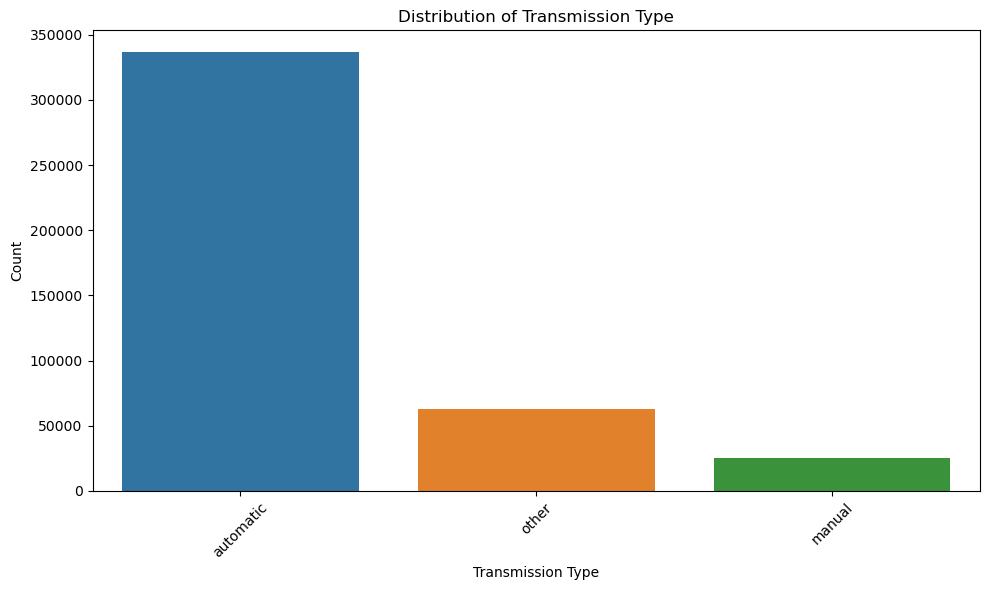

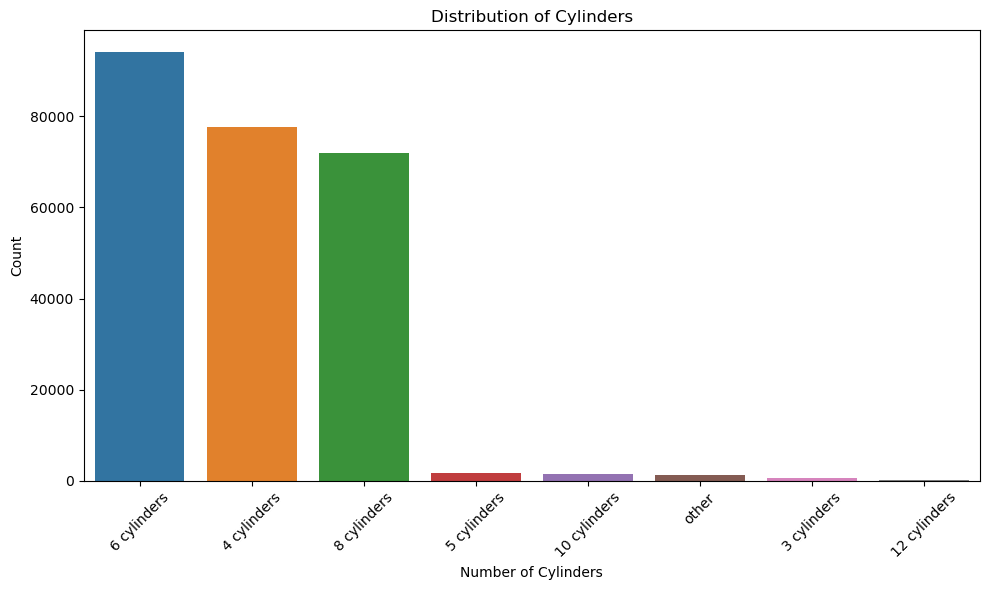

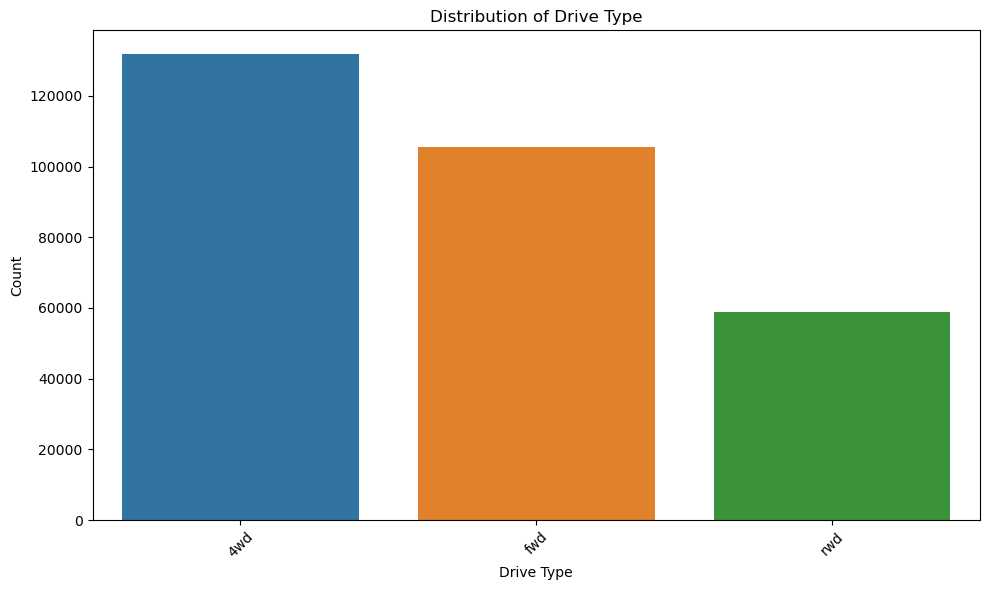

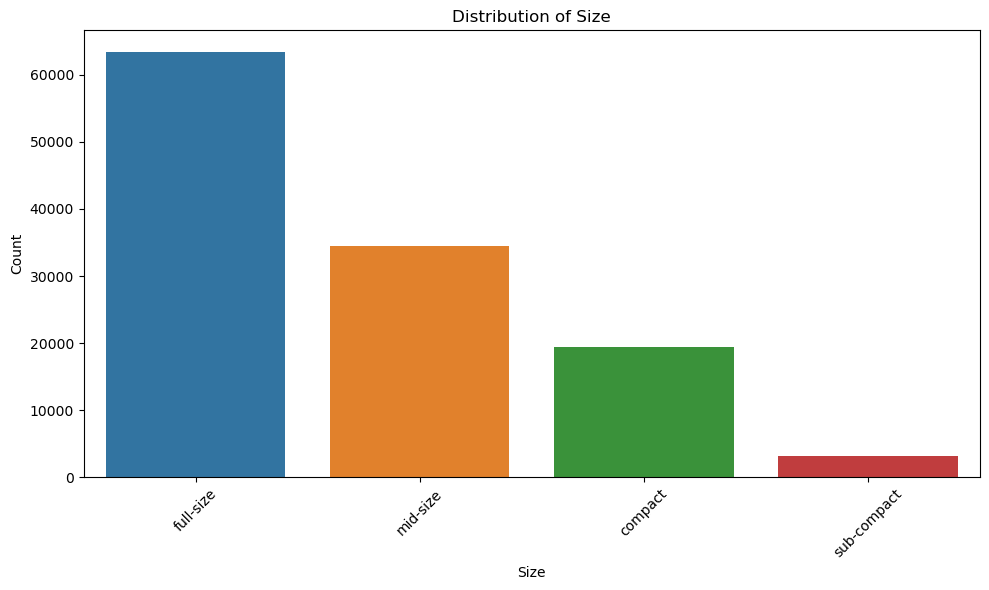

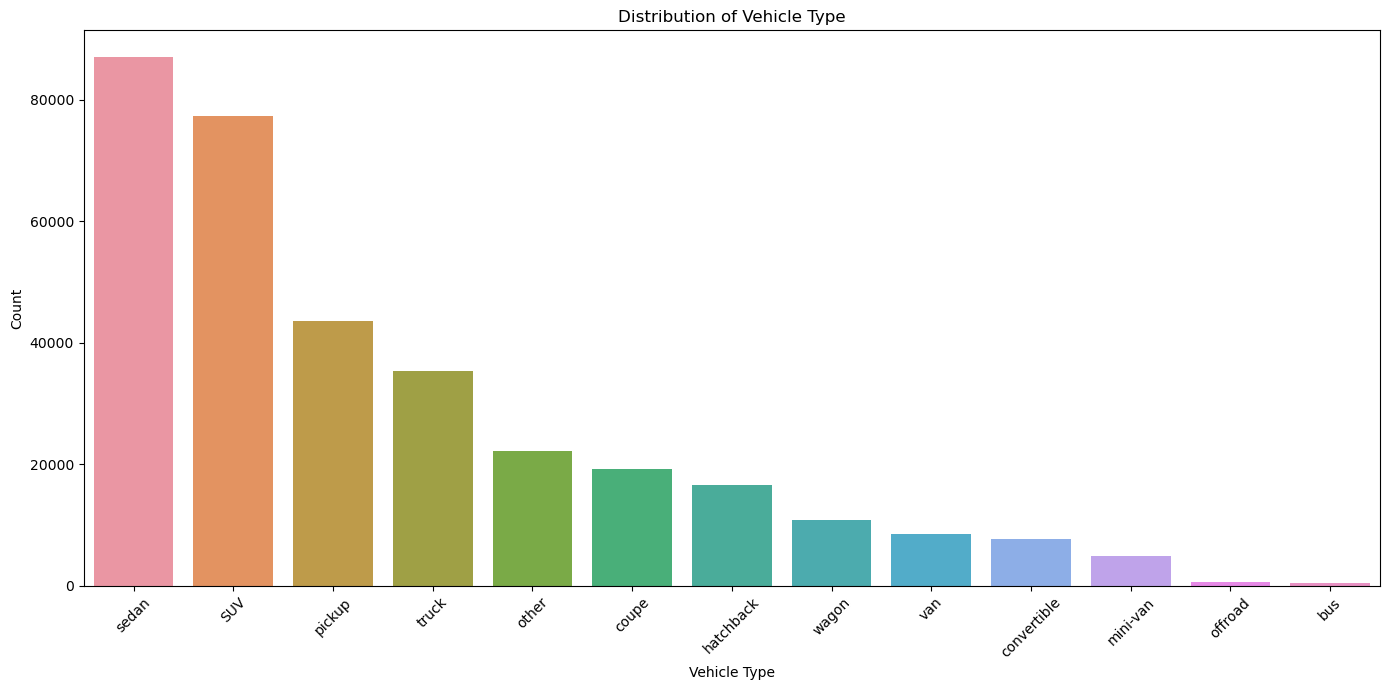

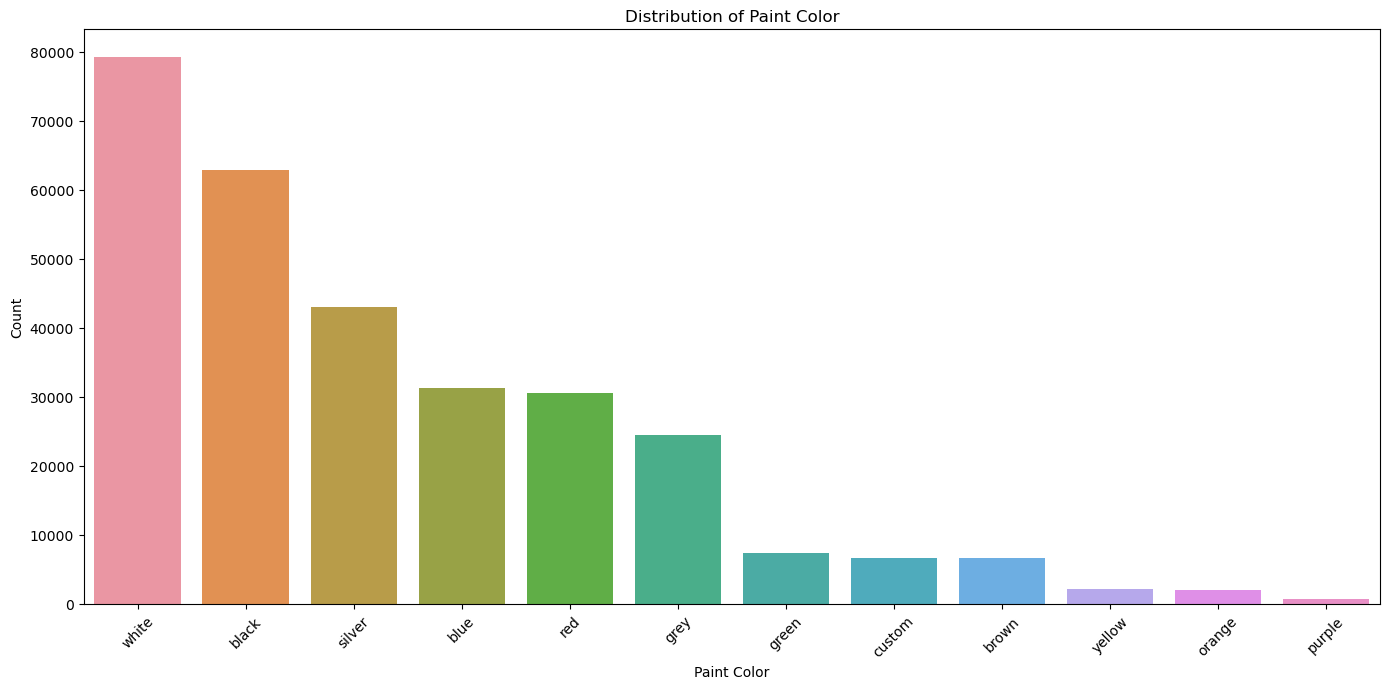

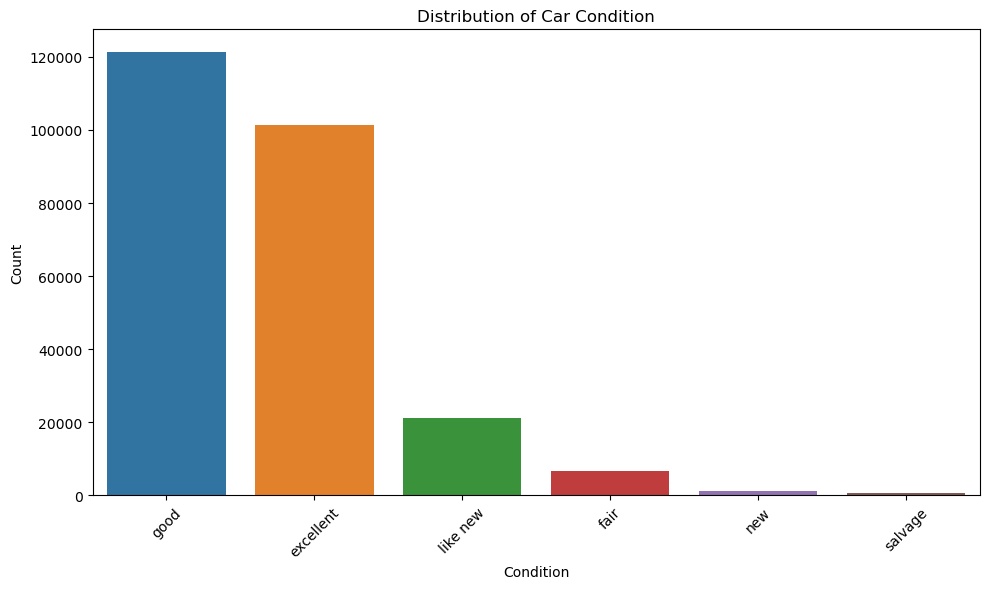

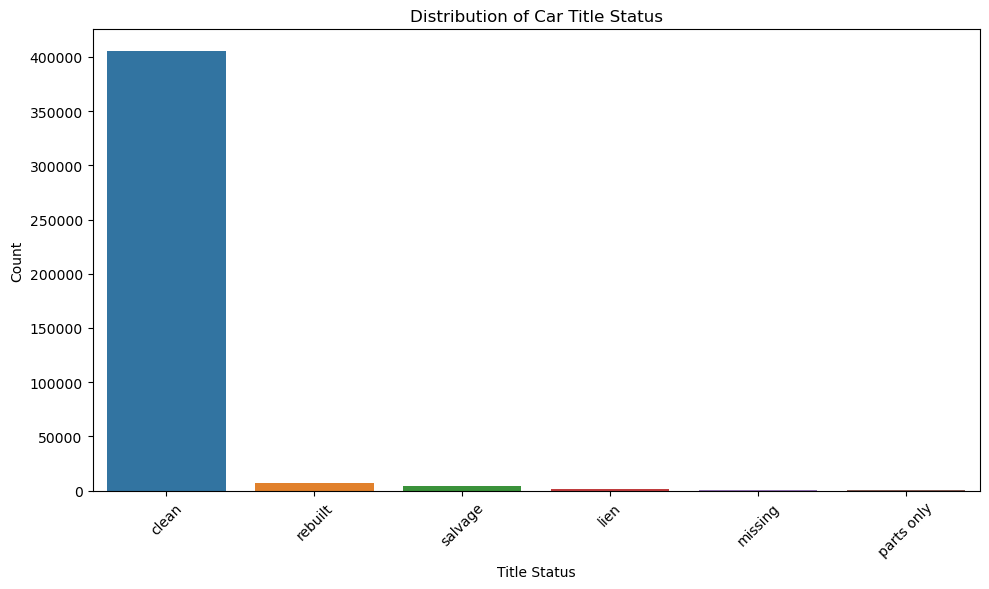

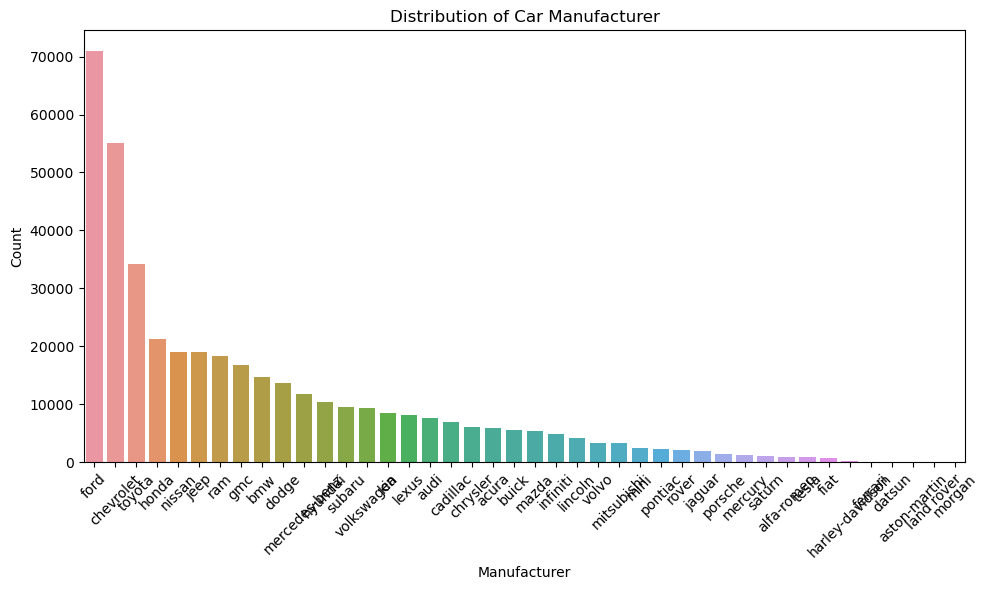

In [11]:
# Plot the distribution of the categorical feature
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the distribution of the 'fuel' column
plt.figure(figsize=(10, 6))
sns.countplot(x='fuel', data=df, order=df['fuel'].value_counts().index)
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the distribution of the 'transmission' column
plt.figure(figsize=(10, 6))
sns.countplot(x='transmission', data=df, order=df['transmission'].value_counts().index)
plt.title('Distribution of Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the distribution of the 'cylinders' column
plt.figure(figsize=(10, 6))
sns.countplot(x='cylinders', data=df, order=df['cylinders'].value_counts().index)
plt.title('Distribution of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the distribution of the 'drive' column
plt.figure(figsize=(10, 6))
sns.countplot(x='drive', data=df, order=df['drive'].value_counts().index)
plt.title('Distribution of Drive Type')
plt.xlabel('Drive Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the distribution of the 'size' column
plt.figure(figsize=(10, 6))
sns.countplot(x='size', data=df, order=df['size'].value_counts().index)
plt.title('Distribution of Size')
plt.xlabel('Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the distribution of the 'type' column
plt.figure(figsize=(14, 7))
sns.countplot(x='type', data=df, order=df['type'].value_counts().index)
plt.title('Distribution of Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the distribution of the 'paint_color' column
plt.figure(figsize=(14, 7))
sns.countplot(x='paint_color', data=df, order=df['paint_color'].value_counts().index)
plt.title('Distribution of Paint Color')
plt.xlabel('Paint Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the distribution of the 'condition' column
plt.figure(figsize=(10, 6))
sns.countplot(x='condition', data=df, order=df['condition'].value_counts().index)
plt.title('Distribution of Car Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the distribution of the 'title_status' column
plt.figure(figsize=(10, 6))
sns.countplot(x='title_status', data=df, order=df['title_status'].value_counts().index)
plt.title('Distribution of Car Title Status')
plt.xlabel('Title Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the distribution of the 'manufacturer' column
plt.figure(figsize=(10, 6))
sns.countplot(x='manufacturer', data=df, order=df['manufacturer'].value_counts().index)
plt.title('Distribution of Car Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [12]:
# Create a copy of df and assign to df2
df2 = df.copy()
# Replace string values with numerical values in the 'cylinders' column of df2
df2['cylinders'] = df['cylinders'].replace({
    '3 cylinders': 3,
    '4 cylinders': 4,
    '5 cylinders': 5,
    '6 cylinders': 6,
    '8 cylinders': 8,
    '10 cylinders': 10,
    '12 cylinders': 12,
    'other': None
})

# Convert the column to numeric, coercing errors to NaN
df2['cylinders'] = pd.to_numeric(df2['cylinders'], errors='coerce')

# Display the unique values in the 'cylinders' column of df2 to verify the changes
display(df2['cylinders'].unique())

array([nan,  8.,  6.,  4.,  5.,  3., 10., 12.])

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       178976
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

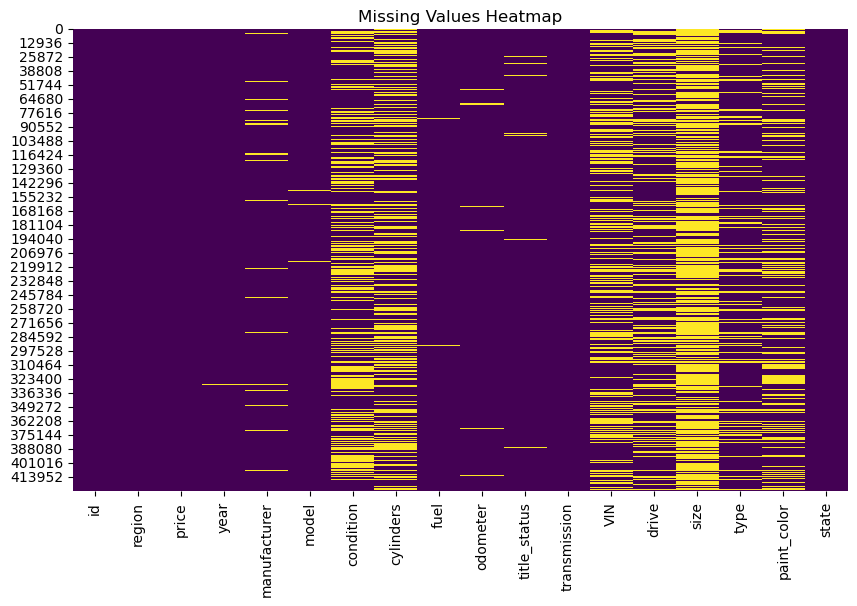

In [13]:
# Check for missing values in the cleaned dataset and visualize the missing data pattern.
missing_values = df2.isnull().sum()
display(missing_values)

# Visualize missing data in the cleaned dataset
plt.figure(figsize=(10, 6))
sns.heatmap(df2.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## <font color="red">Cleaning database

In [14]:
# Remove 'id' and 'VIN' columns
df2 = df2.drop(['id', 'VIN'], axis=1).copy()

# Since the car price is directly related to its odometer reading, lets remove any car entry that has missing odometer reading
# Remove rows with missing odometer values
df2 = df2.dropna(subset=['odometer'])

# Drop rows with missing values in specified columns
cols_to_drop_na = ['manufacturer', 'model', 'condition', 'title_status', 'drive', 'cylinders', 'size', 'type', 'transmission']
df2 = df2.dropna(subset=cols_to_drop_na).copy()

# Since paint color is less relevant to the price of used cars, lets assign the missing values to 'white'
df2['paint_color'] = df2['paint_color'].fillna('white')

# Remove rows with missing cylinder values
df2 = df2.dropna(subset=['cylinders'])

# Will drop the region and state categorical features, since the price of the car is the same nationally with difference in state tax only
df2 = df2.drop(['region', 'state'], axis=1).copy()

# Remove rows where 'title_status' is 'missing' or 'parts only'
df2 = df2[~df2['title_status'].isin(['missing', 'parts only'])].copy()

# Remove rows with year less than 1970
df2 = df2[df2['year'] >= 1970].copy()

# Remove cars manufacturer with less than 10 cars
# Get the value counts of the 'manufacturer' column
manufacturer_counts = df2['manufacturer'].value_counts()
# Get the manufacturers to keep (those with a count of 10 or more)
manufacturers_to_keep = manufacturer_counts[manufacturer_counts >= 10].index
# Filter the DataFrame to keep only the rows with manufacturers in the list to keep
df2 = df2[df2['manufacturer'].isin(manufacturers_to_keep)].copy()

# Display the shape of the cleaned DataFrame after removing columns
display(df2.shape)

(80367, 14)

In [15]:
# Create a new feature called 'age' from the 'year' column
import datetime

current_year = datetime.datetime.now().year
df2['age'] = current_year - df2['year']

# Since we already created car age column, lets drop the year column
df2 = df2.drop(['year'], axis=1).copy()

In [16]:
# Check again for missing values in the cleaned dataset
missing_values = df2.isnull().sum()
display(missing_values)

price           0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
age             0
dtype: int64

In [17]:
# Show the unique values of each column
for col in df2.columns:
    display(f"Unique values for column: {col}")
    display(df2[col].unique())

'Unique values for column: price'

array([15000, 19900, 14000, ..., 11589,  3670, 27294])

'Unique values for column: manufacturer'

array(['ford', 'honda', 'dodge', 'chrysler', 'toyota', 'chevrolet',
       'jeep', 'lexus', 'bmw', 'gmc', 'mercedes-benz', 'mazda', 'ram',
       'nissan', 'ferrari', 'audi', 'mitsubishi', 'infiniti',
       'volkswagen', 'kia', 'hyundai', 'fiat', 'acura', 'cadillac',
       'lincoln', 'jaguar', 'saturn', 'volvo', 'alfa-romeo', 'buick',
       'subaru', 'mini', 'pontiac', 'rover', 'porsche', 'harley-davidson',
       'mercury', 'datsun'], dtype=object)

'Unique values for column: model'

array(['f-150 xlt', 'f250 super duty', 'odyssey', ..., 'f150, platinum',
       'cruze, 2lt', 'gand wagoneer'], dtype=object)

'Unique values for column: condition'

array(['excellent', 'good', 'like new', 'new', 'fair', 'salvage'],
      dtype=object)

'Unique values for column: cylinders'

array([ 6.,  8.,  4.,  5., 10.,  3., 12.])

'Unique values for column: fuel'

array(['gas', 'diesel', 'hybrid', 'other', 'electric'], dtype=object)

'Unique values for column: odometer'

array([128000.,  88000.,  95000., ..., 176261., 172511.,  69550.])

'Unique values for column: title_status'

array(['clean', 'rebuilt', 'salvage', 'lien'], dtype=object)

'Unique values for column: transmission'

array(['automatic', 'manual', 'other'], dtype=object)

'Unique values for column: drive'

array(['rwd', '4wd', 'fwd'], dtype=object)

'Unique values for column: size'

array(['full-size', 'mid-size', 'compact', 'sub-compact'], dtype=object)

'Unique values for column: type'

array(['truck', 'pickup', 'mini-van', 'sedan', 'offroad', 'van', 'SUV',
       'convertible', 'coupe', 'hatchback', 'wagon', 'other', 'bus'],
      dtype=object)

'Unique values for column: paint_color'

array(['black', 'blue', 'silver', 'white', 'grey', 'yellow', 'red',
       'brown', 'green', 'custom', 'purple', 'orange'], dtype=object)

'Unique values for column: age'

array([12., 21., 13., 24.,  8., 22., 17.,  7.,  6., 19., 11., 16., 23.,
       30., 51., 29., 14., 53., 20.,  9., 18.,  4., 31., 10., 25., 15.,
        5., 46., 41., 27., 33., 26., 47., 49., 34., 28., 35., 43., 39.,
       37., 36., 52., 40., 48., 44., 32., 38., 45., 55., 54., 50., 42.,
        3.])

## <font color="red">Outliers Removal:

In [18]:
# Lets try to remove the outliers
features_to_reduce = ['price', 'odometer']
df3 = df2.copy()

for i in features_to_reduce:
    Q1 = df3[i].quantile(0.25)
    Q3 = df3[i].quantile(0.85)
    IQR = Q3 - Q1
    df3 = df3[df3[i] <= (Q3 + (1.5 * IQR))]
    df3 = df3[df3[i] >= (Q1 - (1.5 * IQR))]
    df3 = df3.reset_index(drop=True)

# Remove rows where price is less than 100
df3 = df3[df3['price'] >= 100].copy()

# Display the shape of the DataFrame after outlier removal
display(df3.shape)
df3.describe()

(74197, 14)

price     cylinders       odometer           age
count  74197.000000  74197.000000   74197.000000  74197.000000
mean   12977.070380      5.907665  119954.897934     16.034287
std    10364.391328      1.639880   59437.346346      7.420267
min      100.000000      3.000000       0.000000      3.000000
25%     5500.000000      4.000000   78536.000000     11.000000
50%     9500.000000      6.000000  118000.000000     15.000000
75%    17500.000000      8.000000  158000.000000     19.000000
max    52600.000000     12.000000  336000.000000     55.000000

In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74197 entries, 0 to 78890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         74197 non-null  int64  
 1   manufacturer  74197 non-null  object 
 2   model         74197 non-null  object 
 3   condition     74197 non-null  object 
 4   cylinders     74197 non-null  float64
 5   fuel          74197 non-null  object 
 6   odometer      74197 non-null  float64
 7   title_status  74197 non-null  object 
 8   transmission  74197 non-null  object 
 9   drive         74197 non-null  object 
 10  size          74197 non-null  object 
 11  type          74197 non-null  object 
 12  paint_color   74197 non-null  object 
 13  age           74197 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 8.5+ MB


In [20]:
# For ML model experimentation, I will create a new dataframe with only the numerical features from df3
numerical_df3 = df3.select_dtypes(include=np.number).copy()

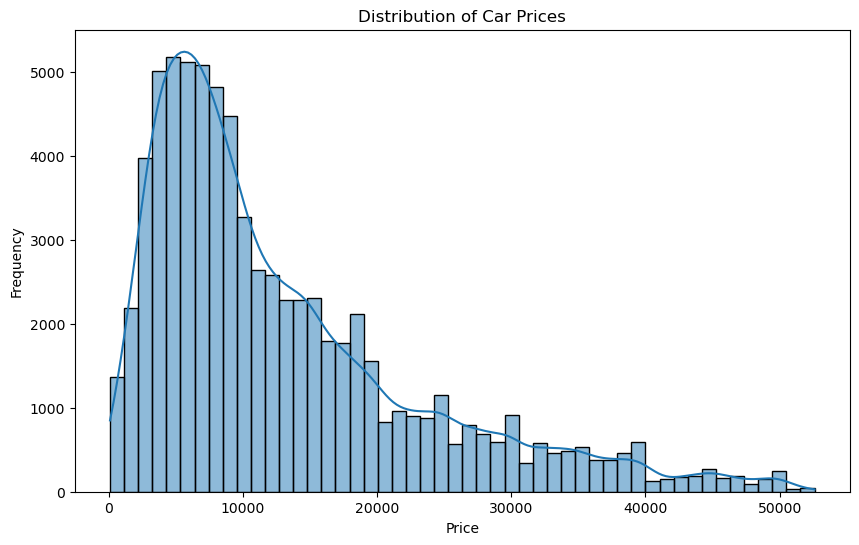

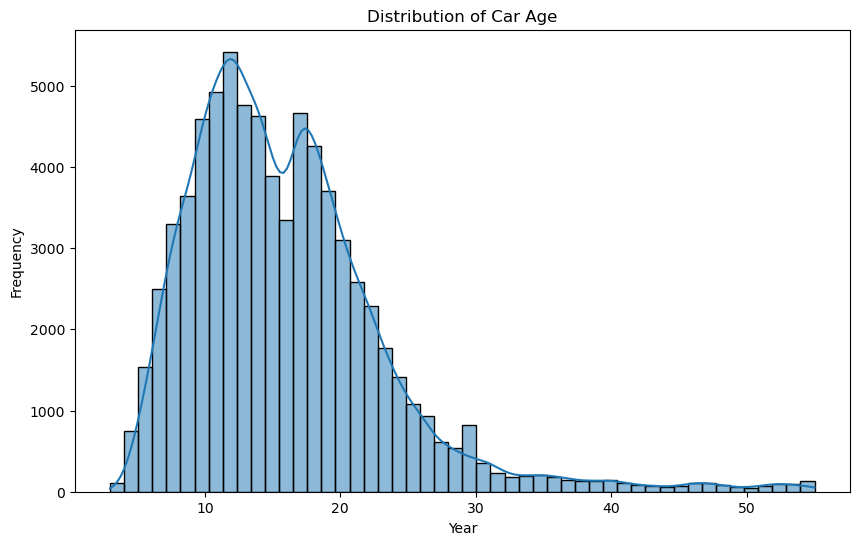

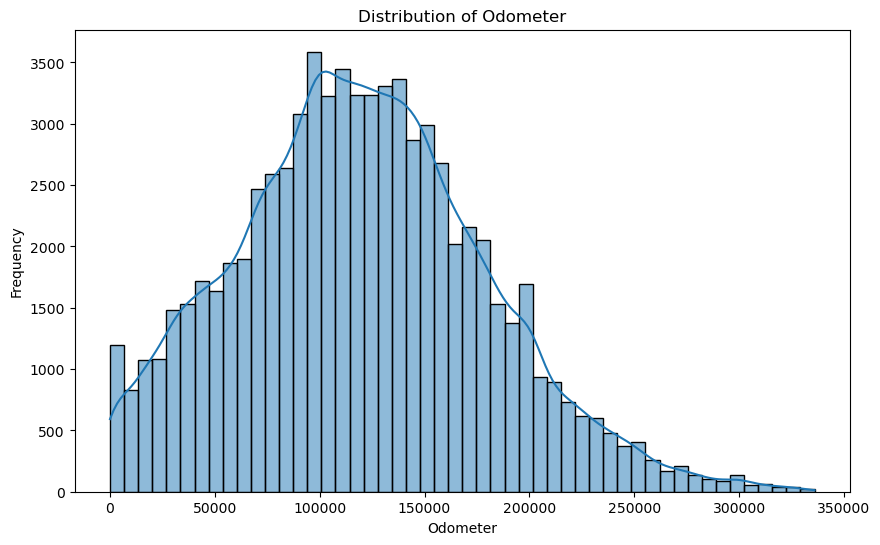

In [21]:
# Plot the distribution of the cleaned 'price', 'year', and 'odometer numerical feature
# Histogram of the 'price' column
plt.figure(figsize=(10, 6))
sns.histplot(df3['price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Histogram of the 'year' column
# From below data, its clear that there aren't many cars before 1960
plt.figure(figsize=(10, 6))
sns.histplot(df3['age'], bins=50, kde=True)
plt.title('Distribution of Car Age')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

# Histogram of the 'odometer' column
plt.figure(figsize=(10, 6))
sns.histplot(df3['odometer'], bins=50, kde=True)
plt.title('Distribution of Odometer')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()

In [22]:
# Show the unique values of each column
for col in df3.columns:
    display(f"Unique values for column: {col}")
    display(df3[col].unique())

'Unique values for column: price'

array([15000, 19900, 14000, ..., 11589,  3670, 27294])

'Unique values for column: manufacturer'

array(['ford', 'honda', 'dodge', 'chrysler', 'toyota', 'jeep', 'lexus',
       'chevrolet', 'bmw', 'gmc', 'mercedes-benz', 'mazda', 'ram',
       'nissan', 'audi', 'mitsubishi', 'infiniti', 'volkswagen', 'kia',
       'hyundai', 'fiat', 'acura', 'cadillac', 'lincoln', 'jaguar',
       'saturn', 'volvo', 'alfa-romeo', 'buick', 'subaru', 'mini',
       'pontiac', 'rover', 'harley-davidson', 'mercury', 'porsche',
       'datsun', 'ferrari'], dtype=object)

'Unique values for column: model'

array(['f-150 xlt', 'f250 super duty', 'odyssey', ..., 'f150, platinum',
       'cruze, 2lt', 'gand wagoneer'], dtype=object)

'Unique values for column: condition'

array(['excellent', 'good', 'new', 'fair', 'like new', 'salvage'],
      dtype=object)

'Unique values for column: cylinders'

array([ 6.,  8.,  4.,  5., 10.,  3., 12.])

'Unique values for column: fuel'

array(['gas', 'diesel', 'hybrid', 'other', 'electric'], dtype=object)

'Unique values for column: odometer'

array([128000.,  88000.,  95000., ..., 176261., 172511.,  69550.])

'Unique values for column: title_status'

array(['clean', 'rebuilt', 'salvage', 'lien'], dtype=object)

'Unique values for column: transmission'

array(['automatic', 'manual', 'other'], dtype=object)

'Unique values for column: drive'

array(['rwd', '4wd', 'fwd'], dtype=object)

'Unique values for column: size'

array(['full-size', 'mid-size', 'compact', 'sub-compact'], dtype=object)

'Unique values for column: type'

array(['truck', 'pickup', 'mini-van', 'sedan', 'offroad', 'SUV',
       'convertible', 'coupe', 'hatchback', 'wagon', 'other', 'van',
       'bus'], dtype=object)

'Unique values for column: paint_color'

array(['black', 'blue', 'silver', 'white', 'grey', 'yellow', 'red',
       'brown', 'green', 'purple', 'custom', 'orange'], dtype=object)

'Unique values for column: age'

array([12., 21., 13., 24.,  8., 22., 17., 19., 11., 16., 23., 30., 51.,
       29., 14., 53.,  6., 20., 18., 31.,  9.,  7., 10., 25., 15.,  5.,
       46., 41., 27., 26., 49., 34., 28.,  4., 35., 43., 39., 37., 36.,
       33., 52., 40., 47., 48., 44., 32., 38., 45., 55., 54., 42., 50.,
        3.])

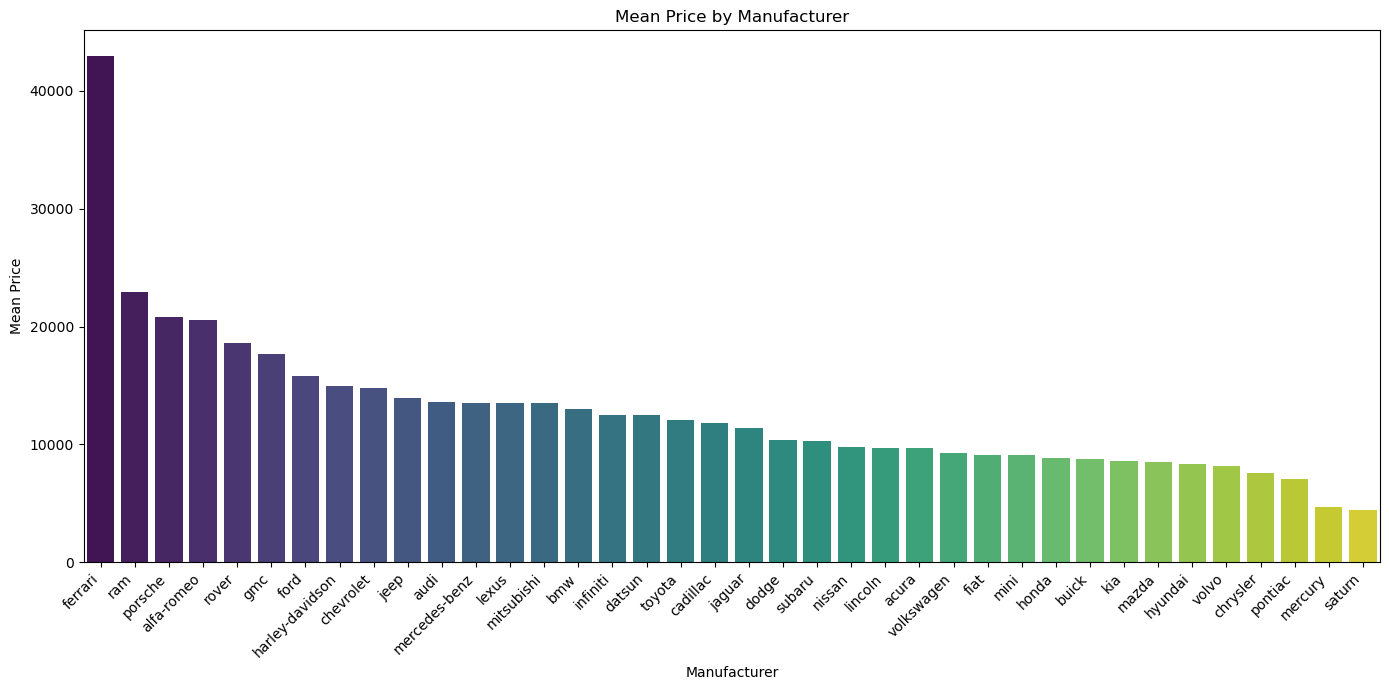

In [23]:
# Calculate the mean price for each manufacturer
manufacturer_mean_price = df3.groupby('manufacturer')['price'].mean().sort_values(ascending=False)

# Plot the mean price for each manufacturer
plt.figure(figsize=(14, 7))
sns.barplot(x=manufacturer_mean_price.index, y=manufacturer_mean_price.values, palette='viridis')
plt.title('Mean Price by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Mean Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## <font color="red">Analyze numerical feature relationships with price

<font color="blue">Visualize the relationship between numerical features (e.g., odometer, age) and price using scatter plots.

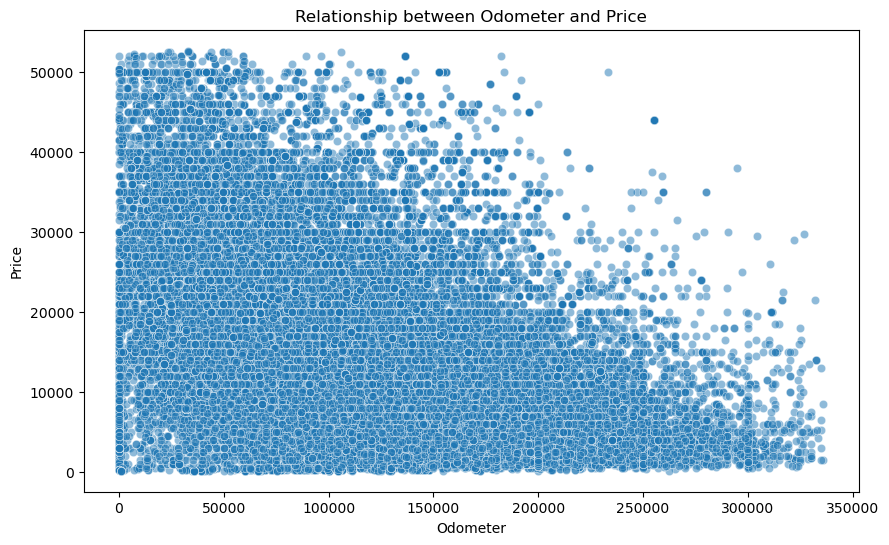

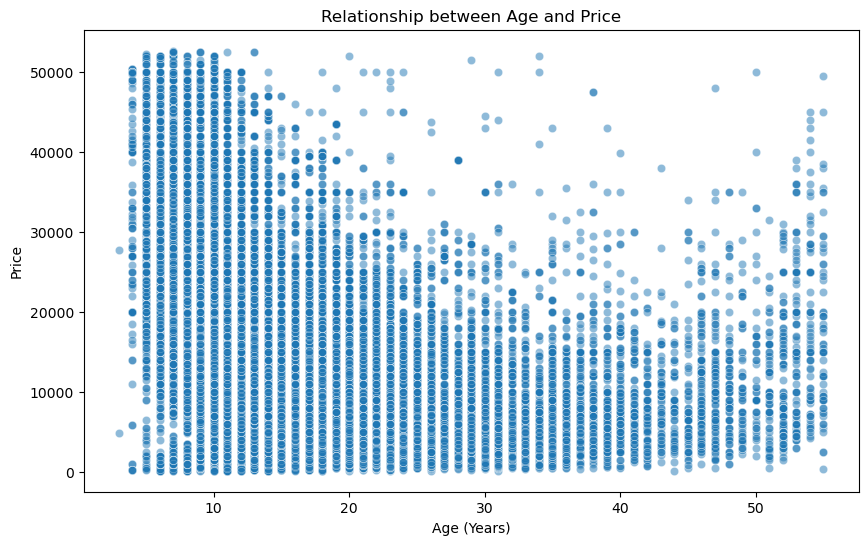

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', data=df3, alpha=0.5)
plt.title('Relationship between Odometer and Price')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='price', data=df3, alpha=0.5)
plt.title('Relationship between Age and Price')
plt.xlabel('Age (Years)')
plt.ylabel('Price')
plt.show()

## <font color="red">Analyze categorical feature relationships with price

<font color="blue">Visualize the relationship between categorical features (e.g., manufacturer, condition, fuel type) and price using box plots to see price distributions within each category.

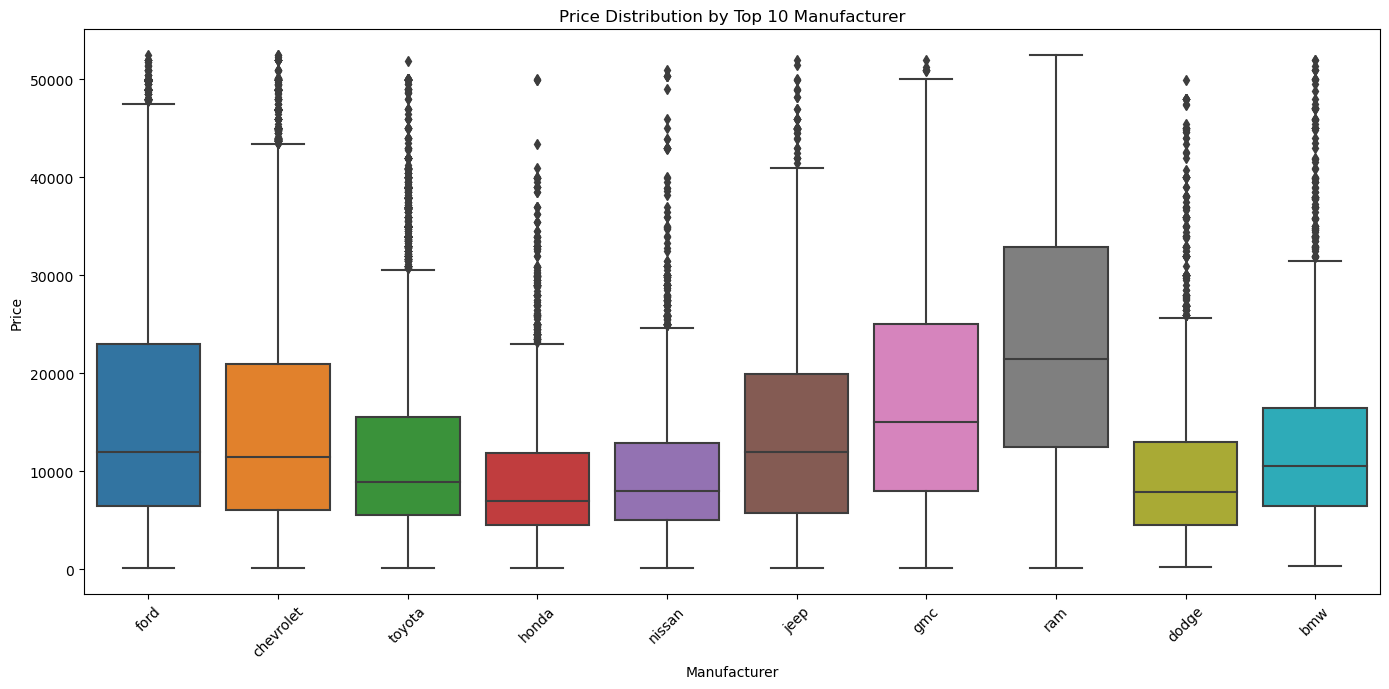

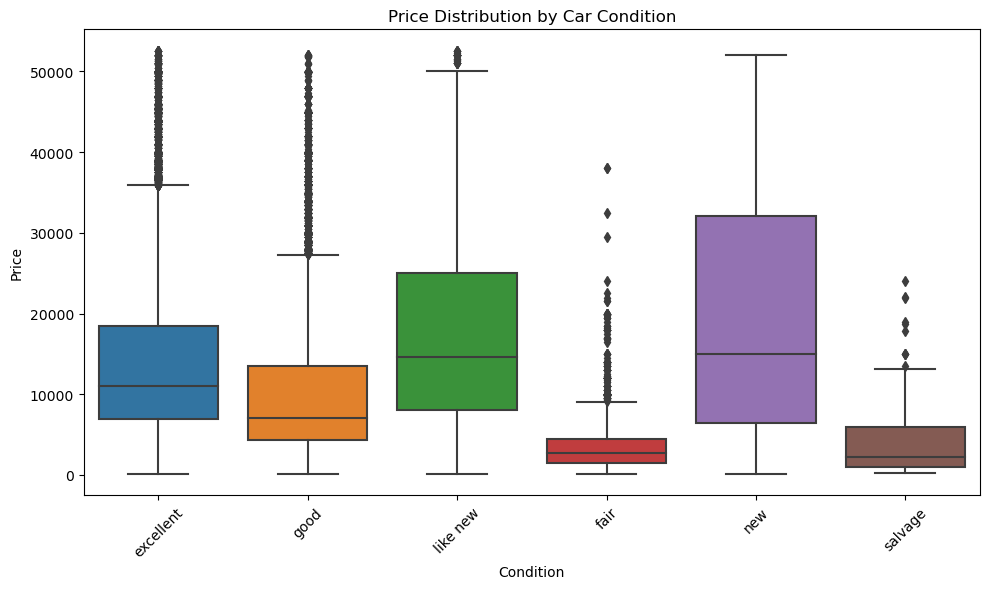

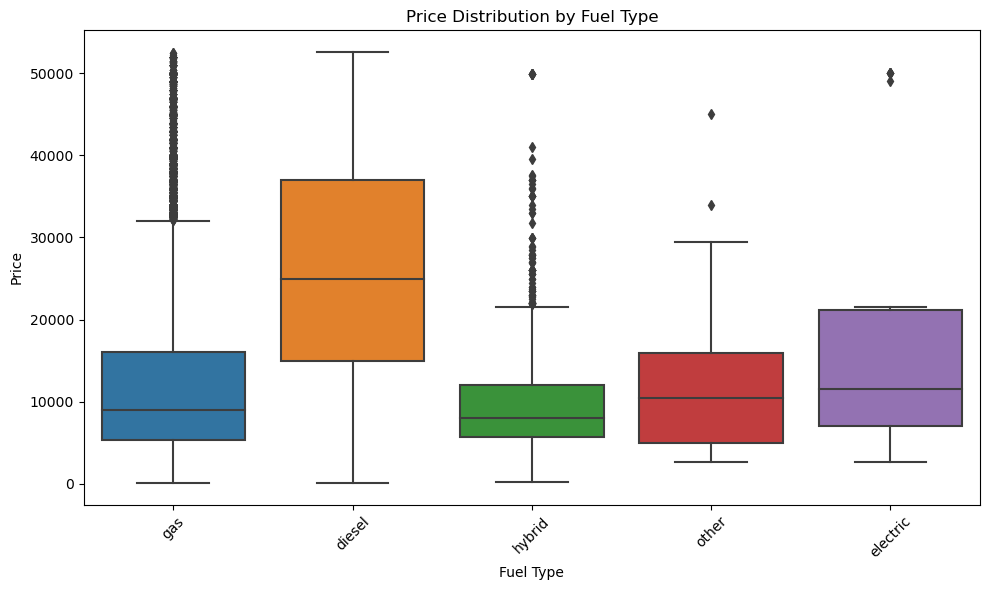

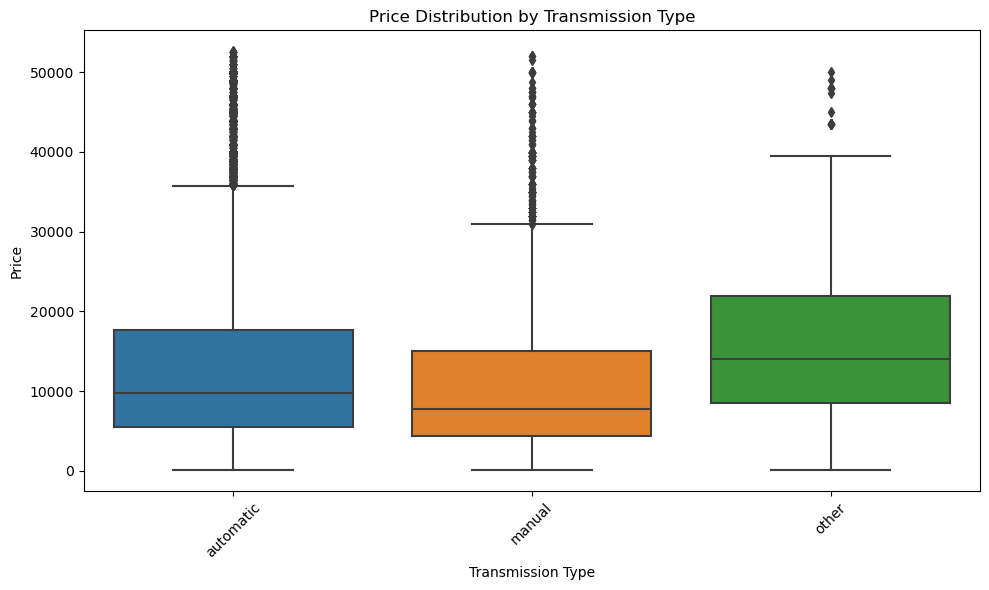

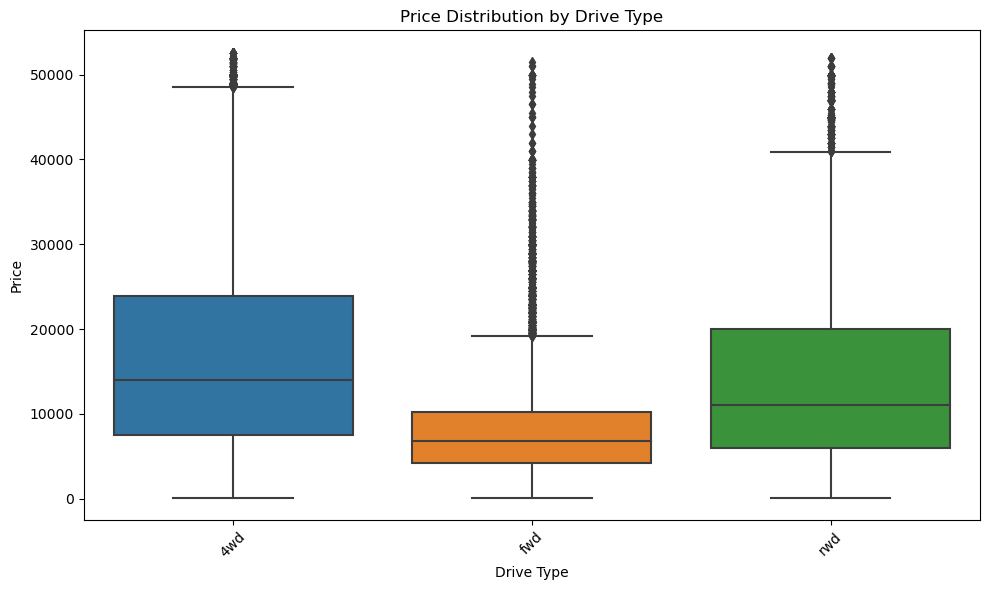

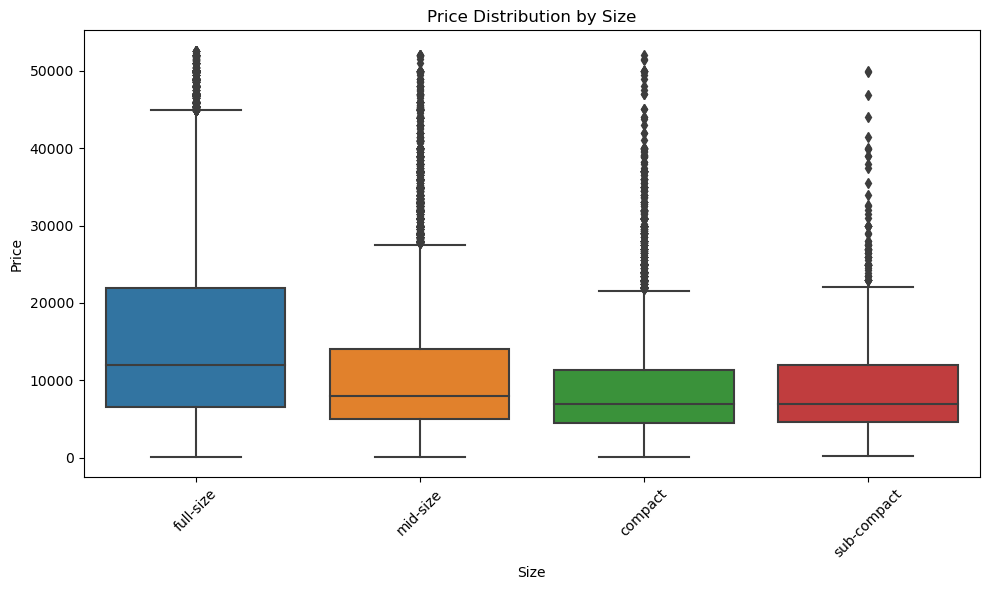

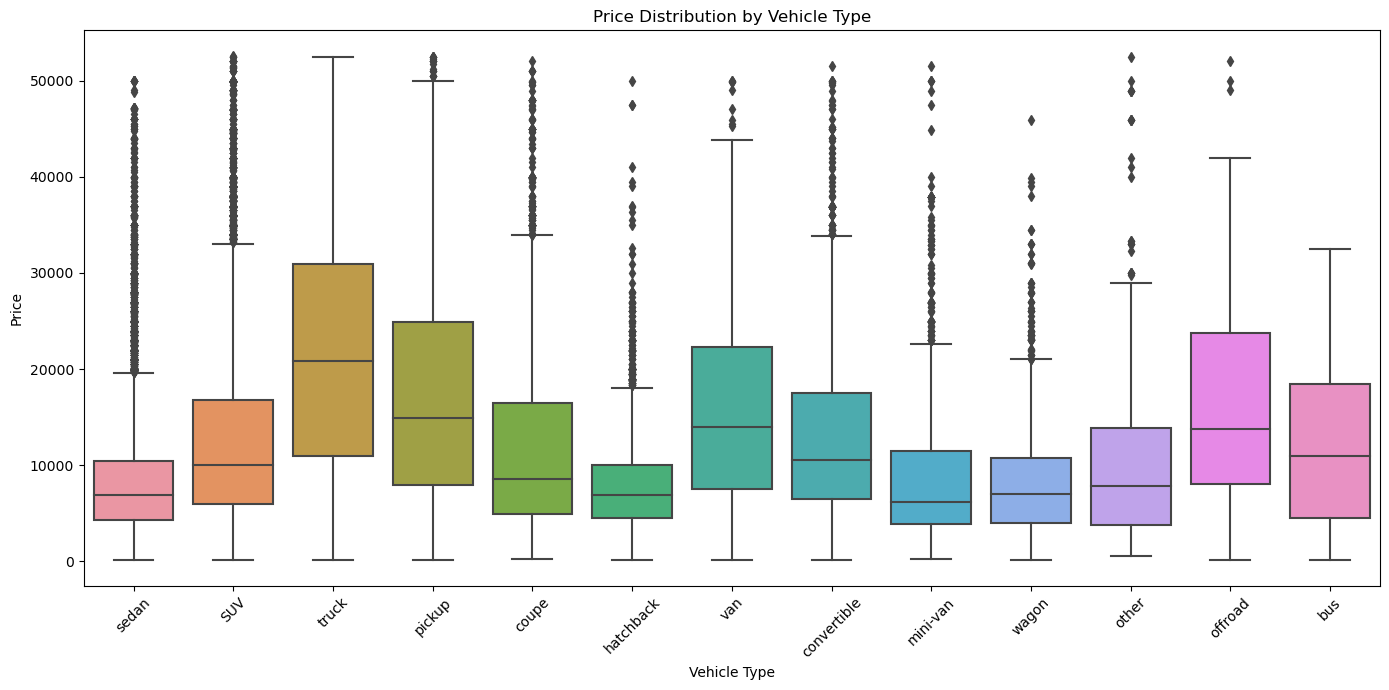

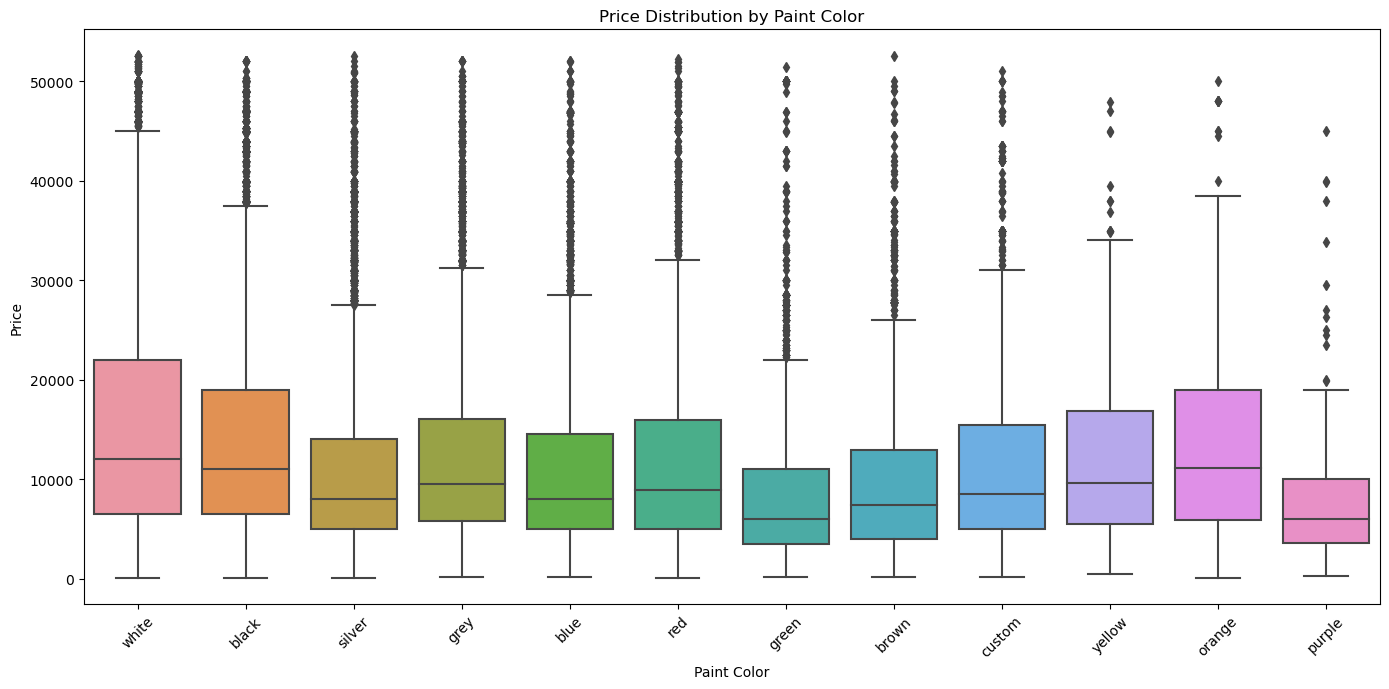

In [25]:
# Select the top 10 manufacturers by count
top_manufacturers = df3['manufacturer'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top manufacturers
df3_top_manufacturers = df3[df3['manufacturer'].isin(top_manufacturers)].copy()

# Create a box plot for 'manufacturer' and 'price'
plt.figure(figsize=(14, 7))
sns.boxplot(x='manufacturer', y='price', data=df3_top_manufacturers, order=top_manufacturers)
plt.title('Price Distribution by Top 10 Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a box plot for 'condition' and 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=df3, order=df3['condition'].value_counts().index)
plt.title('Price Distribution by Car Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a box plot for 'fuel' and 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='price', data=df3, order=df3['fuel'].value_counts().index)
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a box plot for 'transmission' and 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='price', data=df3, order=df3['transmission'].value_counts().index)
plt.title('Price Distribution by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a box plot for 'drive' and 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x='drive', y='price', data=df3, order=df3['drive'].value_counts().index)
plt.title('Price Distribution by Drive Type')
plt.xlabel('Drive Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a box plot for 'size' and 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x='size', y='price', data=df3, order=df3['size'].value_counts().index)
plt.title('Price Distribution by Size')
plt.xlabel('Size')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a box plot for 'type' and 'price'
plt.figure(figsize=(14, 7))
sns.boxplot(x='type', y='price', data=df3, order=df3['type'].value_counts().index)
plt.title('Price Distribution by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a box plot for 'paint_color' and 'price'
plt.figure(figsize=(14, 7))
sns.boxplot(x='paint_color', y='price', data=df3, order=df3['paint_color'].value_counts().index)
plt.title('Price Distribution by Paint Color')
plt.xlabel('Paint Color')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## <font color="red">Feature interactions

<font color="blue">Explore potential interactions between features that might influence price.

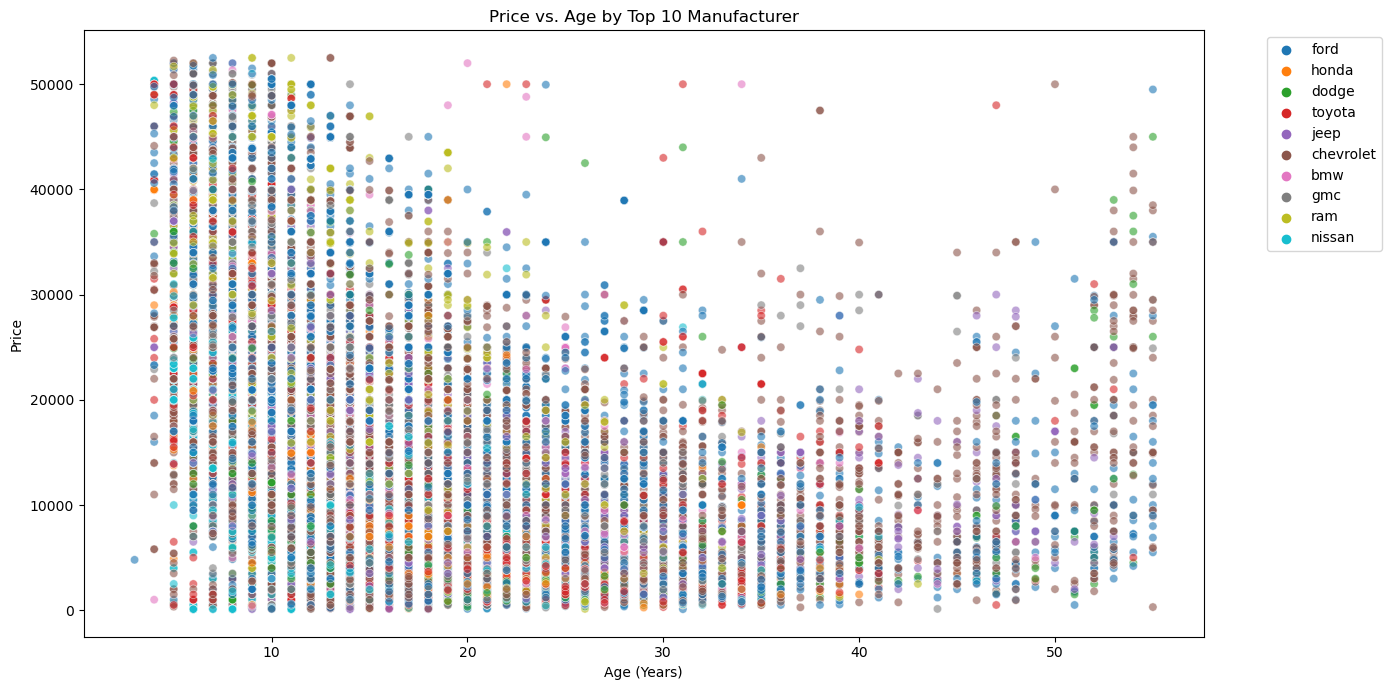

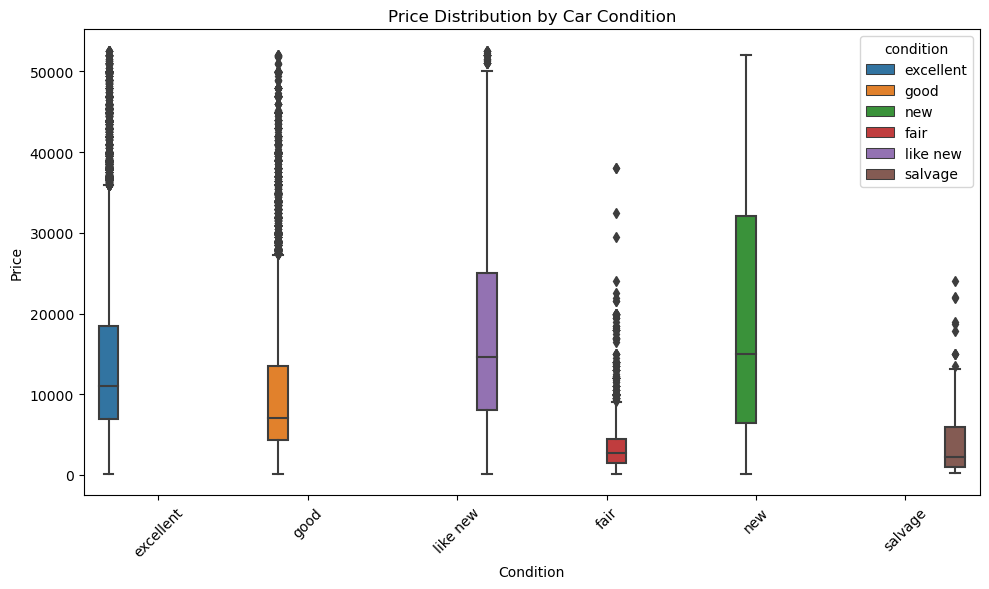

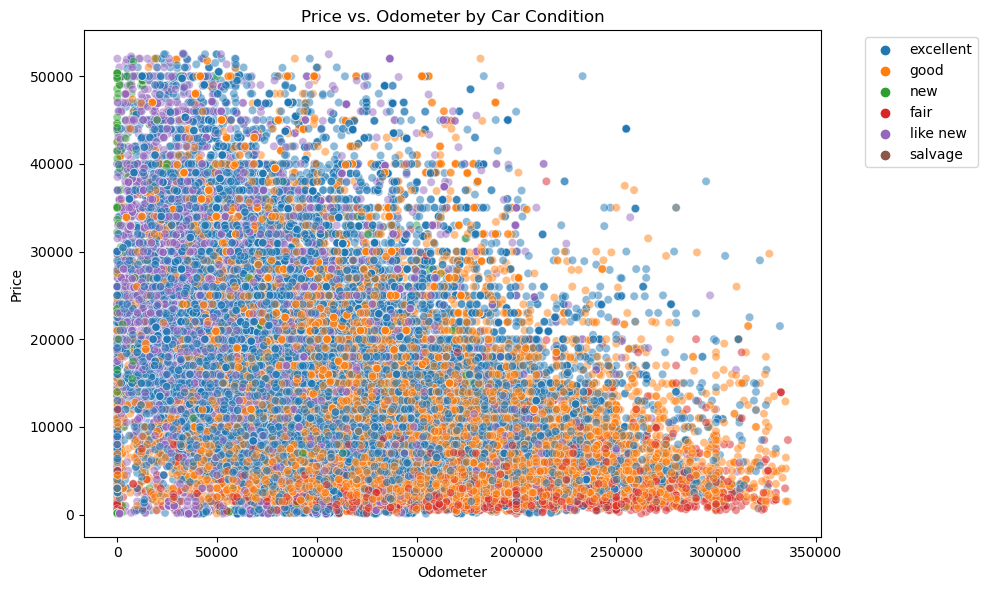

In [26]:
# Create an interaction term between 'age' and 'manufacturer' (focusing on top manufacturers for visualization)
df3_top_manufacturers['age_manufacturer'] = df3_top_manufacturers['age'] * df3_top_manufacturers['manufacturer'].astype('category').cat.codes

# Visualize the relationship between 'age' and 'price', colored by 'manufacturer' (using top manufacturers)
plt.figure(figsize=(14, 7))
sns.scatterplot(x='age', y='price', hue='manufacturer', data=df3_top_manufacturers, alpha=0.6)
plt.title('Price vs. Age by Top 10 Manufacturer')
plt.xlabel('Age (Years)')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Create an interaction term between 'odometer' and 'condition'
# For visualization, we can use grouped box plots or scatter plots with color encoding for condition
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', hue='condition', data=df3, order=df3['condition'].value_counts().index)
plt.title('Price Distribution by Car Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', hue='condition', data=df3, alpha=0.5)
plt.title('Price vs. Odometer by Car Condition')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

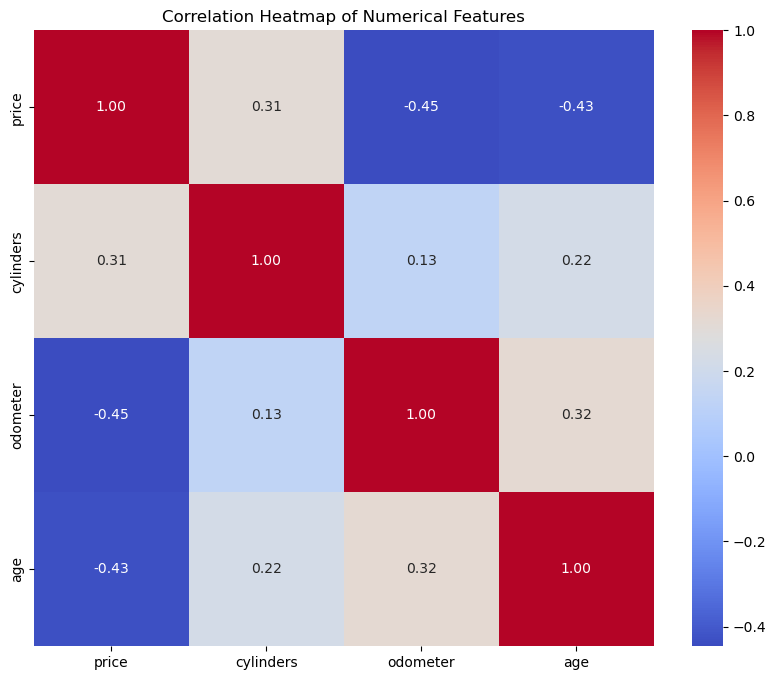

In [27]:
# Select only the numerical columns from df3
numerical_df3 = df3.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df3.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## <font color="red">Key Features Impacting Car Prices

<font color="blue">Based on the above visualizations and analysis, the following features appear to have the most significant impact on car prices:

- <font color="blue">**Manufacturer:** The bar plot of mean price by manufacturer shows a clear variation in price across different brands. High-end manufacturers like Ferrari, Ram, and Porsche generally have higher average prices compared to others.
- <font color="blue">**Condition:** The box plot of price by condition indicates that cars in 'like new' or 'new' condition tend to have higher prices than those in 'good', 'excellent', 'fair', or 'salvage' condition.
- <font color="blue">**Odometer:** The scatter plot of odometer vs. price shows a negative correlation, meaning that as the odometer reading increases (more mileage), the price of the car generally decreases.
- <font color="blue">**Age:** Similar to the odometer, the scatter plot of age vs. price also shows a negative correlation, indicating that older cars tend to be less expensive.
- <font color="blue">**Type:** The box plot of price by vehicle type reveals differences in price distributions across different types of vehicles (e.g., trucks and SUVs tend to have higher median prices than sedans).
- <font color="blue">**Fuel Type:** The box plot of price by fuel type shows that diesel and electric cars tend to have higher median prices compared to gas, hybrid, and other fuel types.
- <font color="blue">**Drive:** The box plot of price by drive type indicates that 4wd vehicles generally have higher median prices than fwd and rwd vehicles.
- <font color="blue">**Cylinders:** While not explicitly visualized with price, the number of cylinders is often correlated with engine size and performance, which can influence price.
- <font color="blue">**Model:** This feature has a very high number of unique values, which can make it challenging to use effectively in some models, especially after one-hot encoding. While specific models within a manufacturer do affect price, including all of them might not be beneficial for a general model, and it could lead to a very sparse dataset.  Therefore, I consider dropping this feature.
- <font color="blue">**paint_color:** The box plot showed some variation in price by paint color, but the differences were not as pronounced as with features like 'manufacturer' or 'condition'. Therefore, I consider dropping this feature.

In [28]:
# Drop 'model' and 'paint_color' columns
df3 = df3.drop(['model', 'paint_color'], axis=1).copy()

# Display the shape of the DataFrame after dropping columns
display(df3.shape)

(74197, 12)

In [29]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74197 entries, 0 to 78890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         74197 non-null  int64  
 1   manufacturer  74197 non-null  object 
 2   condition     74197 non-null  object 
 3   cylinders     74197 non-null  float64
 4   fuel          74197 non-null  object 
 5   odometer      74197 non-null  float64
 6   title_status  74197 non-null  object 
 7   transmission  74197 non-null  object 
 8   drive         74197 non-null  object 
 9   size          74197 non-null  object 
 10  type          74197 non-null  object 
 11  age           74197 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 7.4+ MB


In [30]:
# Group manufacturers with a low number of cars into an 'count_lt_1k' category before one-hot encoding.
# Get the value counts for the 'manufacturer' column
manufacturer_counts = df3['manufacturer'].value_counts()

# Get the list of manufacturers to be grouped into 'count_lt_1k'
manufacturers_to_group = manufacturer_counts[manufacturer_counts < 1000].index

# Replace the low frequency manufacturers with 'count_lt_1k' in the 'manufacturer' column
df3['manufacturer'] = df3['manufacturer'].replace(manufacturers_to_group, 'count_lt_1k')

# Get the list of manufacturers to be grouped into 'count_1k_2_1p5k'
manufacturers_to_group = manufacturer_counts[(manufacturer_counts >= 1000) & (manufacturer_counts < 1500)].index

# Replace these manufacturers with 'count_1k_2_1p5k' in the 'manufacturer' column
df3['manufacturer'] = df3['manufacturer'].replace(manufacturers_to_group, 'count_1k_2_1p5k')

# Display the value counts after grouping to verify
display(df3['manufacturer'].value_counts())

manufacturer
ford               14140
chevrolet          11026
count_lt_1k         7577
toyota              6858
count_1k_2_1p5k     6037
honda               4862
nissan              3847
jeep                3039
gmc                 2891
ram                 2535
dodge               2235
bmw                 2015
subaru              1979
mercedes-benz       1727
hyundai             1718
volkswagen          1711
Name: count, dtype: int64

In [31]:
# Apply one-hot encoding to the specified categorical features
df4 = pd.get_dummies(df3, columns=['manufacturer', 'condition', 'fuel', 'transmission', 'drive', 'size', 'type', 'title_status'], dtype=int)

# Display the first few rows of the new DataFrame
display(df4.head())

price  cylinders  odometer   age  manufacturer_bmw  manufacturer_chevrolet  \
0  15000        6.0  128000.0  12.0                 0                       0   
1  19900        8.0   88000.0  21.0                 0                       0   
2  14000        6.0   95000.0  13.0                 0                       0   
3  22500        8.0  144700.0  24.0                 0                       0   
4  15000        8.0   90000.0   8.0                 0                       0   

   manufacturer_count_1k_2_1p5k  manufacturer_count_lt_1k  manufacturer_dodge  \
0                             0                         0                   0   
1                             0                         0                   0   
2                             0                         0                   0   
3                             0                         0                   0   
4                             0                         0                   1   

   manufacturer_ford  ...  type_other  type_pickup  type_sedan  type_truck  \
0                  1  ...           0            0           0           1   
1                  1  ...           0            1           0           0   
2                  0  ...           0            0           0           0   
3                  1  ...           0            0           0           1   
4                  0  ...           0            0           1           0   

   type_van  type_wagon  title_status_clean  title_status_lien  \
0         0           0                   1                  0   
1         0           0                   1                  0   
2         0           0                   1                  0   
3         0           0                   1                  0   
4         0           0                   0                  0   

   title_status_rebuilt  title_status_salvage  
0                     0                     0  
1                     0                     0  
2                     0                     0  
3                     0                     0  
4                     1                     0  

[5 rows x 58 columns]

In [32]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74197 entries, 0 to 78890
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         74197 non-null  int64  
 1   cylinders                     74197 non-null  float64
 2   odometer                      74197 non-null  float64
 3   age                           74197 non-null  float64
 4   manufacturer_bmw              74197 non-null  int64  
 5   manufacturer_chevrolet        74197 non-null  int64  
 6   manufacturer_count_1k_2_1p5k  74197 non-null  int64  
 7   manufacturer_count_lt_1k      74197 non-null  int64  
 8   manufacturer_dodge            74197 non-null  int64  
 9   manufacturer_ford             74197 non-null  int64  
 10  manufacturer_gmc              74197 non-null  int64  
 11  manufacturer_honda            74197 non-null  int64  
 12  manufacturer_hyundai          74197 non-null  int64  
 13  manufa

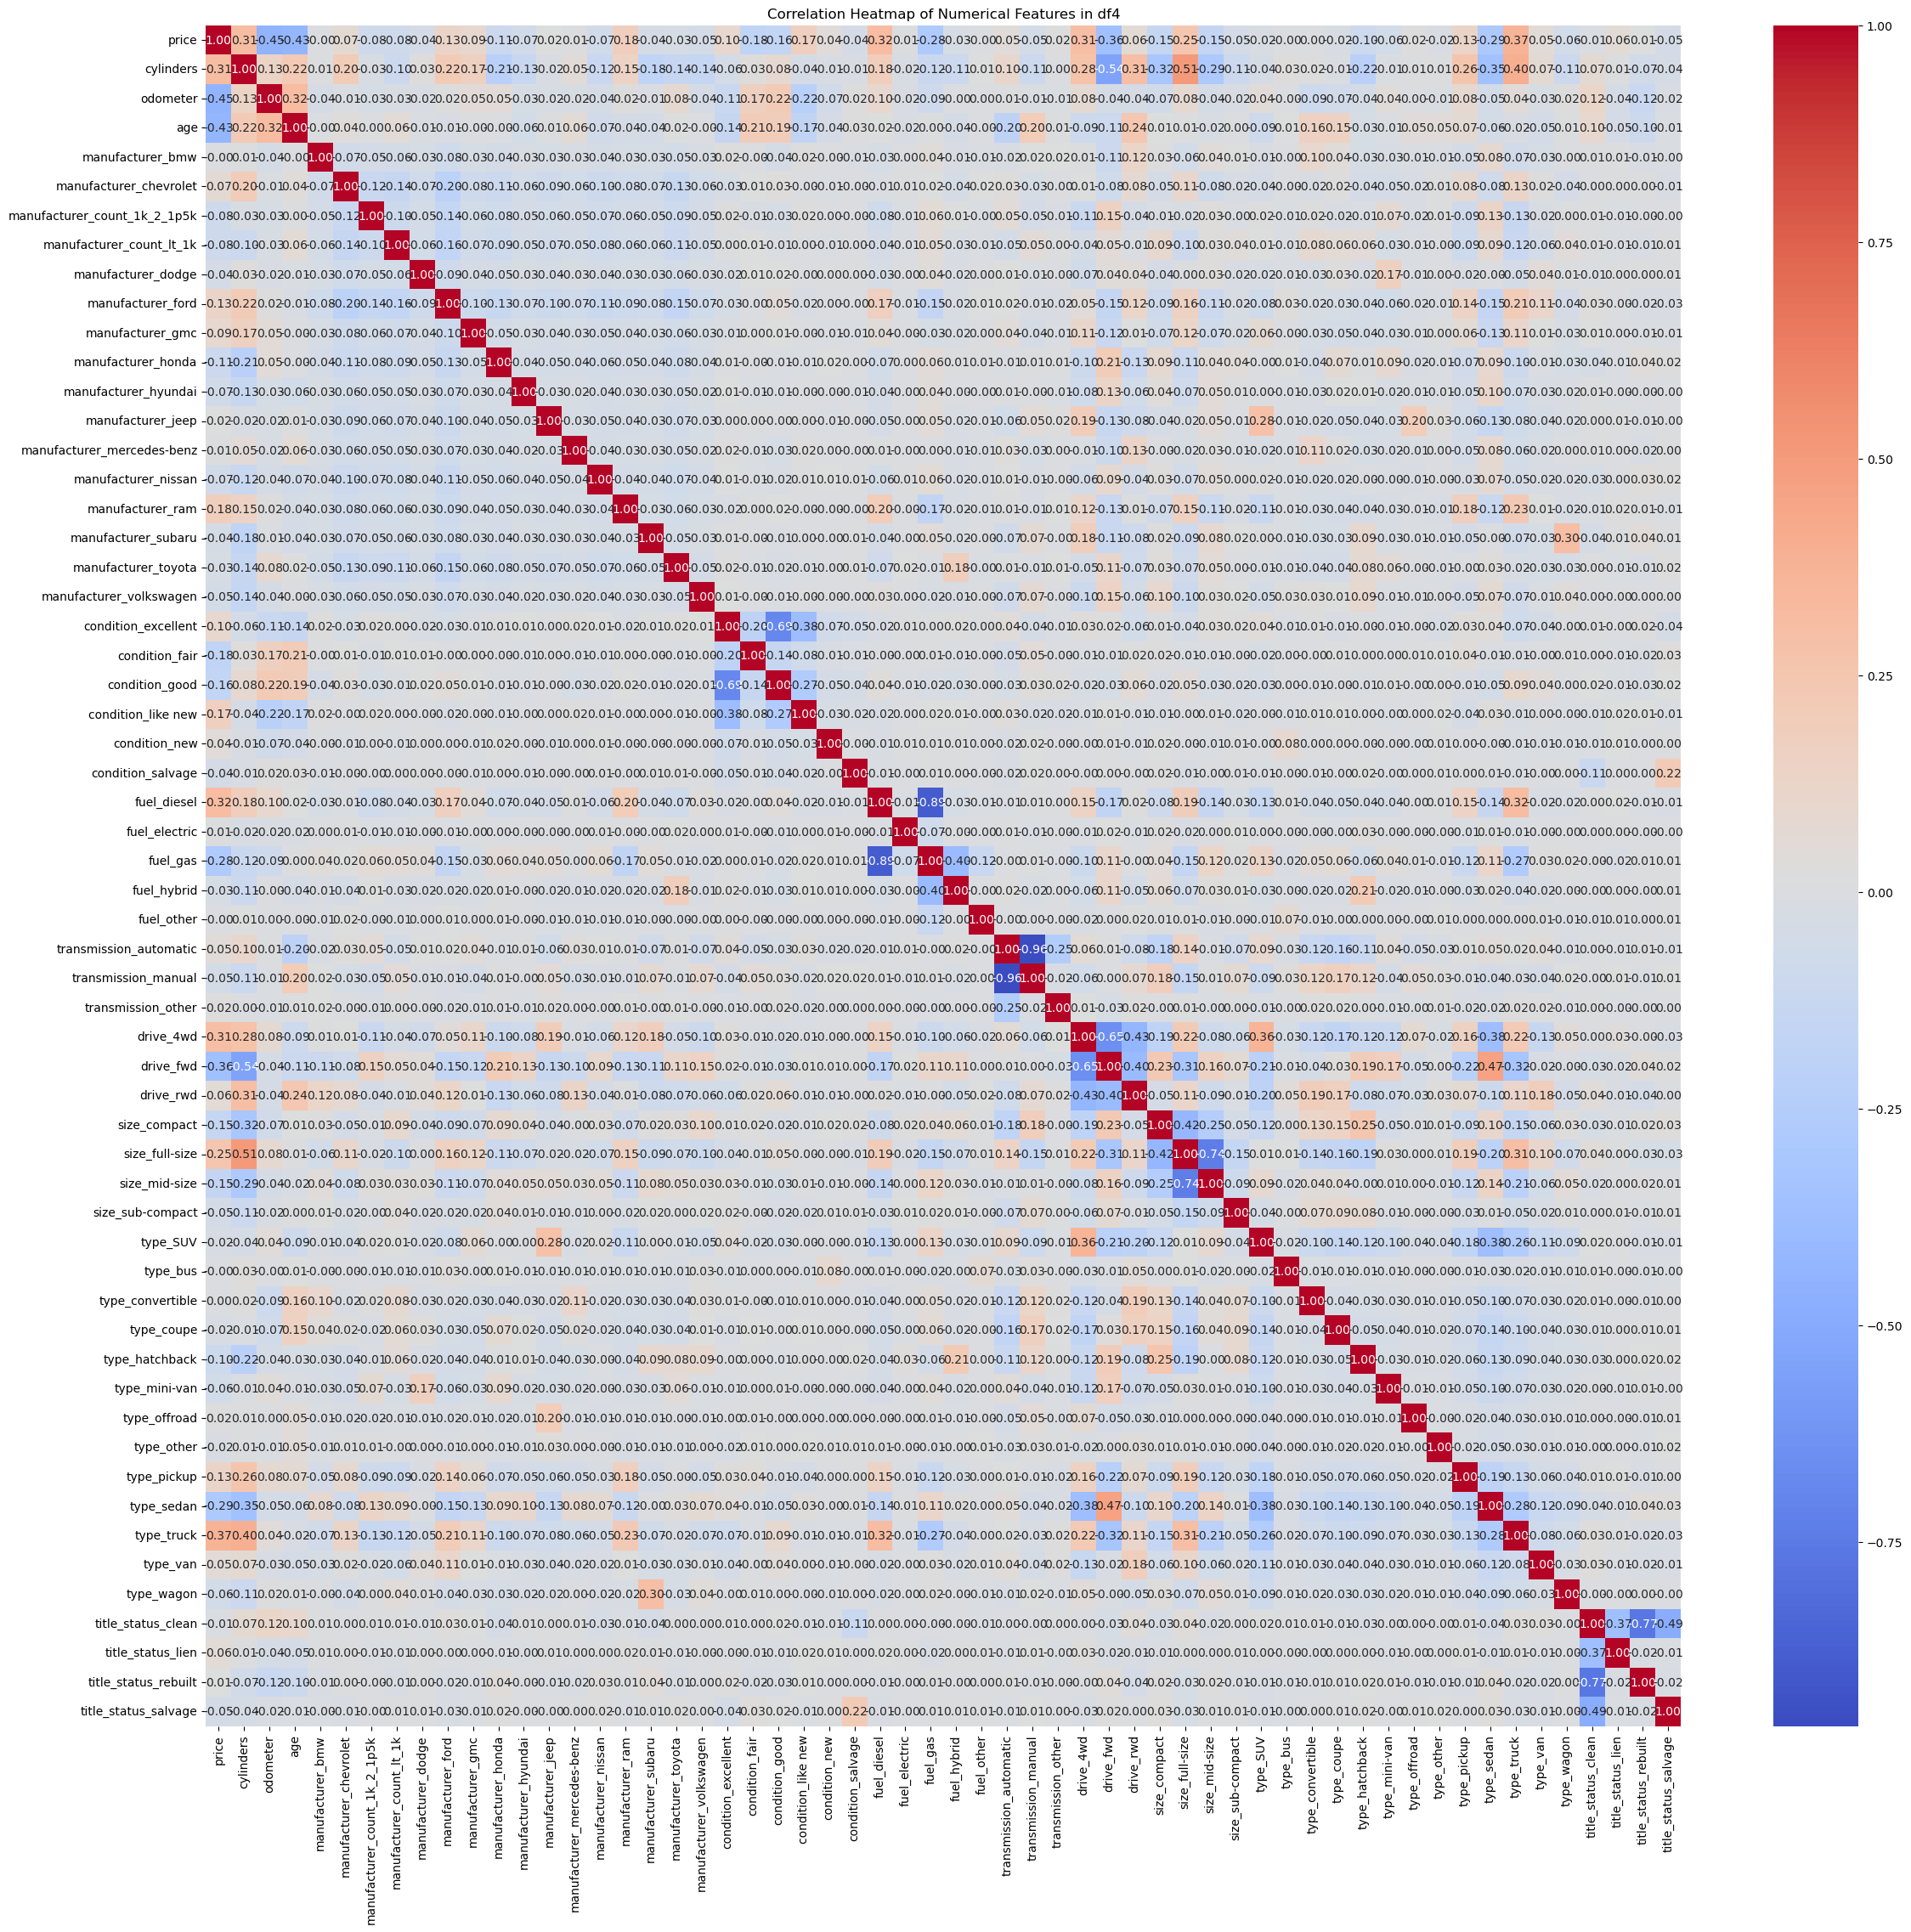

In [33]:
# Select only the numerical columns from df4
numerical_df4 = df4.select_dtypes(include=np.number)

# Calculate the correlation matrix for numerical features in df4
correlation_matrix_numerical_df4 = numerical_df4.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(28, 26)) # Increased figure size
sns.heatmap(correlation_matrix_numerical_df4, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features in df4')
plt.show()

In [34]:
# Display the correlation matrix as a table
display(correlation_matrix_numerical_df4)

price  cylinders  odometer       age  \
price                         1.000000   0.310055 -0.446039 -0.430096   
cylinders                     0.310055   1.000000  0.134385  0.222445   
odometer                     -0.446039   0.134385  1.000000  0.320463   
age                          -0.430096   0.222445  0.320463  1.000000   
manufacturer_bmw             -0.000094   0.006424 -0.038510 -0.000627   
manufacturer_chevrolet        0.071184   0.203265 -0.010744  0.038262   
manufacturer_count_1k_2_1p5k -0.084859  -0.025840 -0.034191  0.004418   
manufacturer_count_lt_1k     -0.083541  -0.104371 -0.025797  0.058941   
manufacturer_dodge           -0.044785   0.027714 -0.015727 -0.010229   
manufacturer_ford             0.130788   0.216722  0.018583 -0.014419   
manufacturer_gmc              0.091021   0.171415  0.052061 -0.001034   
manufacturer_honda           -0.105979  -0.212930  0.050961 -0.001723   
manufacturer_hyundai         -0.069458  -0.129918 -0.029580 -0.058887   
manufacturer_jeep             0.018505  -0.015152 -0.021782  0.007751   
manufacturer_mercedes-benz    0.008578   0.051154 -0.024541  0.058688   
manufacturer_nissan          -0.072534  -0.122761 -0.039500 -0.072482   
manufacturer_ram              0.180142   0.147045  0.020913 -0.042754   
manufacturer_subaru          -0.042526  -0.176147 -0.005288 -0.044087   
manufacturer_toyota          -0.027589  -0.137619  0.084128  0.018487   
manufacturer_volkswagen      -0.054782  -0.142807 -0.040935 -0.003118   
condition_excellent           0.102640  -0.057518 -0.112078 -0.142287   
condition_fair               -0.177514   0.031314  0.170698  0.206818   
condition_good               -0.163801   0.082773  0.217700  0.193340   
condition_like new            0.173047  -0.042432 -0.222635 -0.169176   
condition_new                 0.044049  -0.014299 -0.065953 -0.044590   
condition_salvage            -0.043338  -0.014228  0.023662  0.025938   
fuel_diesel                   0.319418   0.182580  0.098570  0.016202   
fuel_electric                 0.010190  -0.022604 -0.019075 -0.016564   
fuel_gas                     -0.276844  -0.119145 -0.087265  0.003740   
fuel_hybrid                  -0.029799  -0.108482 -0.001135 -0.039958   
fuel_other                   -0.003575   0.014595  0.000356 -0.000163   
transmission_automatic        0.045344   0.103710  0.009041 -0.196020   
transmission_manual          -0.052897  -0.107762 -0.006068  0.200362   
transmission_other            0.021721   0.002290 -0.011721  0.007564   
drive_4wd                     0.305458   0.279247  0.075235 -0.090771   
drive_fwd                    -0.360711  -0.543226 -0.042332 -0.110945   
drive_rwd                     0.059272   0.308484 -0.040809  0.242246   
size_compact                 -0.146825  -0.318382 -0.065870  0.012403   
size_full-size                0.250107   0.505497  0.083488  0.010418   
size_mid-size                -0.150719  -0.287364 -0.037450 -0.021181   
size_sub-compact             -0.049351  -0.105822 -0.019152  0.003596   
type_SUV                     -0.022651  -0.038302  0.042207 -0.086887   
type_bus                     -0.002969   0.031422 -0.000486  0.012433   
type_convertible              0.002219   0.024259 -0.089382  0.159153   
type_coupe                   -0.023523  -0.011987 -0.068812  0.154523   
type_hatchback               -0.096052  -0.216922 -0.036328 -0.031994   
type_mini-van                -0.063270  -0.007040  0.035859 -0.007407   
type_offroad                  0.021953   0.010694  0.001024  0.047382   
type_other                   -0.017065   0.008856 -0.009667  0.047079   
type_pickup                   0.127011   0.260736  0.083651  0.068151   
type_sedan                   -0.286319  -0.350876 -0.052133 -0.056003   
type_truck                    0.373189   0.397208  0.042241 -0.015845   
type_van                      0.054428   0.071806 -0.026408 -0.050136   
type_wagon                   -0.063960  -0.108407  0.019999  0.009570   
title_status_clean

In [35]:
# Calculate the correlation of all features with 'price'
price_correlations = df4.corr()['price'].sort_values(key=abs, ascending=False)

# Drop the correlation of 'price' with itself
price_correlations = price_correlations.drop('price')

# Display the features with the highest absolute correlation in descending order
display("Top 20 features with highest absolute correlation with price:")
display(price_correlations.head(53))

'Top 20 features with highest absolute correlation with price:'

odometer                       -0.446039
age                            -0.430096
type_truck                      0.373189
drive_fwd                      -0.360711
fuel_diesel                     0.319418
cylinders                       0.310055
drive_4wd                       0.305458
type_sedan                     -0.286319
fuel_gas                       -0.276844
size_full-size                  0.250107
manufacturer_ram                0.180142
condition_fair                 -0.177514
condition_like new              0.173047
condition_good                 -0.163801
size_mid-size                  -0.150719
size_compact                   -0.146825
manufacturer_ford               0.130788
type_pickup                     0.127011
manufacturer_honda             -0.105979
condition_excellent             0.102640
type_hatchback                 -0.096052
manufacturer_gmc                0.091021
manufacturer_count_1k_2_1p5k   -0.084859
manufacturer_count_lt_1k       -0.083541
manufacturer_nis

In [36]:
# For experimentation, I'm creating a new dataframe that has highly correlated (>0.1) features with 'price'
# Select features with absolute correlation greater than 0.1
selected_features = price_correlations[abs(price_correlations) > 0.1].index.tolist()

# Create a new DataFrame with the selected features and the target variable
df5 = df4[selected_features + ['price']].copy()

# Display the shape of the new DataFrame
display(df5.shape)

(74197, 21)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [37]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = df4.drop('price', axis=1)
y = df4['price']

# train_test_split shuffles the data by default, but we explicitly set shuffle=True for clarity
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (59357, 57)
Shape of X_test: (14840, 57)
Shape of y_train: (59357,)
Shape of y_test: (14840,)


In [38]:
# Apply standardization to the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Initialize and train a Linear Regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [40]:
# Initialize and train a Ridge Regression model
from sklearn.linear_model import Ridge

# You can adjust the alpha parameter (regularization strength)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [41]:
# Perform hyperparameter tuning for the Ridge Regression model
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]}

# Initialize GridSearchCV with the Ridge model and parameter grid
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Print the best cross-validation score
print("Best cross-validation score (negative MSE):", grid_search.best_score_)

# Get the best model
best_ridge_model = grid_search.best_estimator_

Best parameters: {'alpha': 100.0}
Best cross-validation score (negative MSE): -36375287.170015715


In [42]:
# Initialize and train a Lasso Regression model
from sklearn.linear_model import Lasso

# We can adjust the alpha parameter (regularization strength)
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled, y_train)

Lasso()

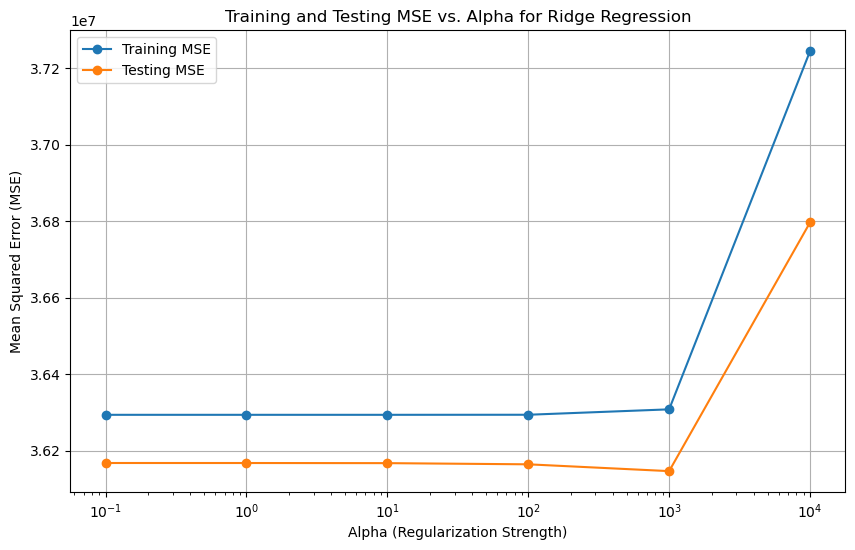

In [57]:
# Plot the training and testing MSE for different alpha values

# Get the alpha values used in the grid search
alpha_values = param_grid['alpha']

# Calculate training and testing MSE for each alpha value
train_mse = []
test_mse = []

for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)

    y_train_pred = ridge.predict(X_train_scaled)
    y_test_pred = ridge.predict(X_test_scaled)

    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

# Plot the MSE values
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, train_mse, marker='o', label='Training MSE')
plt.plot(alpha_values, test_mse, marker='o', label='Testing MSE')
plt.xscale('log')  # Use log scale for alpha values
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Testing MSE vs. Alpha for Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()

### Use Sequential Feature Selection (SFS)

In [58]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# Initialize a Linear Regression model
lr = LinearRegression()

# Initialize SequentialFeatureSelector
# We need to specify the number of features to select. Let's start by selecting a smaller number, e.g., 10.
sfs = SequentialFeatureSelector(lr, n_features_to_select=10, cv=5)

# Fit SFS to the training data
sfs.fit(X_train_scaled, y_train)

# Get the selected feature indices and names
selected_feature_indices = sfs.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]

print("Selected features by SFS:")
print(selected_feature_names)

Selected features by SFS:
Index(['cylinders', 'odometer', 'age', 'manufacturer_toyota', 'condition_good',
       'fuel_diesel', 'drive_fwd', 'type_pickup', 'type_sedan', 'type_truck'],
      dtype='object')


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [59]:
# Evaluate the Linear Regression model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

R-squared: 0.6526
Mean Absolute Error (MAE): 4313.56
Mean Squared Error (MSE): 36169179.45
Root Mean Squared Error (RMSE): 6014.08


In [60]:
# Evaluate the Ridge Regression model
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Calculate evaluation metrics
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print("Ridge Regression Model Evaluation:")
print(f"R-squared: {r2_ridge:.4f}")
print(f"Mean Absolute Error (MAE): {mae_ridge:.2f}")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge:.2f}")

Ridge Regression Model Evaluation:
R-squared: 0.6526
Mean Absolute Error (MAE): 4313.73
Mean Squared Error (MSE): 36167587.86
Root Mean Squared Error (RMSE): 6013.95


In [61]:
# Evaluate the best Ridge Regression model
y_pred_best_ridge = best_ridge_model.predict(X_test_scaled)

# Calculate evaluation metrics
r2_best_ridge = r2_score(y_test, y_pred_best_ridge)
mae_best_ridge = mean_absolute_error(y_test, y_pred_best_ridge)
mse_best_ridge = mean_squared_error(y_test, y_pred_best_ridge)
rmse_best_ridge = np.sqrt(mse_best_ridge)

print("Best Ridge Regression Model Evaluation (after tuning):")
print(f"R-squared: {r2_best_ridge:.4f}")
print(f"Mean Absolute Error (MAE): {mae_best_ridge:.2f}")
print(f"Mean Squared Error (MSE): {mse_best_ridge:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_best_ridge:.2f}")

Best Ridge Regression Model Evaluation (after tuning):
R-squared: 0.6526
Mean Absolute Error (MAE): 4313.49
Mean Squared Error (MSE): 36164182.39
Root Mean Squared Error (RMSE): 6013.67


In [62]:
# Evaluate the Lasso Regression model
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Calculate evaluation metrics
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

print("Lasso Regression Model Evaluation:")
print(f"R-squared: {r2_lasso:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lasso:.2f}")
print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso:.2f}")

Lasso Regression Model Evaluation:
R-squared: 0.6526
Mean Absolute Error (MAE): 4313.61
Mean Squared Error (MSE): 36167665.81
Root Mean Squared Error (RMSE): 6013.96


In [63]:
# Evaluate the SFS model
# Create new training and testing sets with selected features
X_train_selected = X_train_scaled[:, selected_feature_indices]
X_test_selected = X_test_scaled[:, selected_feature_indices]

# Initialize and train a Linear Regression model using selected features
model_selected = LinearRegression()
model_selected.fit(X_train_selected, y_train)

# Evaluate the Linear Regression model with selected features
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred_selected = model_selected.predict(X_test_selected)

# Calculate evaluation metrics
r2_selected = r2_score(y_test, y_pred_selected)
mae_selected = mean_absolute_error(y_test, y_pred_selected)
mse_selected = mean_squared_error(y_test, y_pred_selected)
rmse_selected = np.sqrt(mse_selected)

print("Linear Regression Model Evaluation (with SFS selected features):")
print(f"R-squared: {r2_selected:.4f}")
print(f"Mean Absolute Error (MAE): {mae_selected:.2f}")
print(f"Mean Squared Error (MSE): {mse_selected:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_selected:.2f}")

Linear Regression Model Evaluation (with SFS selected features):
R-squared: 0.6284
Mean Absolute Error (MAE): 4487.61
Mean Squared Error (MSE): 38685521.85
Root Mean Squared Error (RMSE): 6219.77


In [64]:
# Create a dictionary to store the evaluation results
results = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Best Ridge Regression', 'Lasso Regression', 'Linear Regression (SFS)'],
    'R-squared': [r2, r2_ridge, r2_best_ridge, r2_lasso, r2_selected],
    'MAE': [mae, mae_ridge, mae_best_ridge, mae_lasso, mae_selected],
    'MSE': [mse, mse_ridge, mse_best_ridge, mse_lasso, mse_selected],
    'RMSE': [rmse, rmse_ridge, rmse_best_ridge, rmse_lasso, rmse_selected]
}

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Display the results table
display("Model Comparison:")
display(results_df)

'Model Comparison:'

Model  R-squared          MAE           MSE         RMSE
0        Linear Regression   0.652562  4313.556569  3.616918e+07  6014.081763
1         Ridge Regression   0.652577  4313.731199  3.616759e+07  6013.949439
2    Best Ridge Regression   0.652610  4313.494149  3.616418e+07  6013.666302
3         Lasso Regression   0.652577  4313.607356  3.616767e+07  6013.955920
4  Linear Regression (SFS)   0.628390  4487.611789  3.868552e+07  6219.768633

#### <font color="red">Based on the above model comparison table, the Best Ridge Regression model appears to be the best performing model. It has the lowest Mean Squared Error (MSE) and Root Mean Squared Error (RMSE), and the highest R-squared value among all the models evaluated. While the differences are small, it indicates slightly better predictive performance.

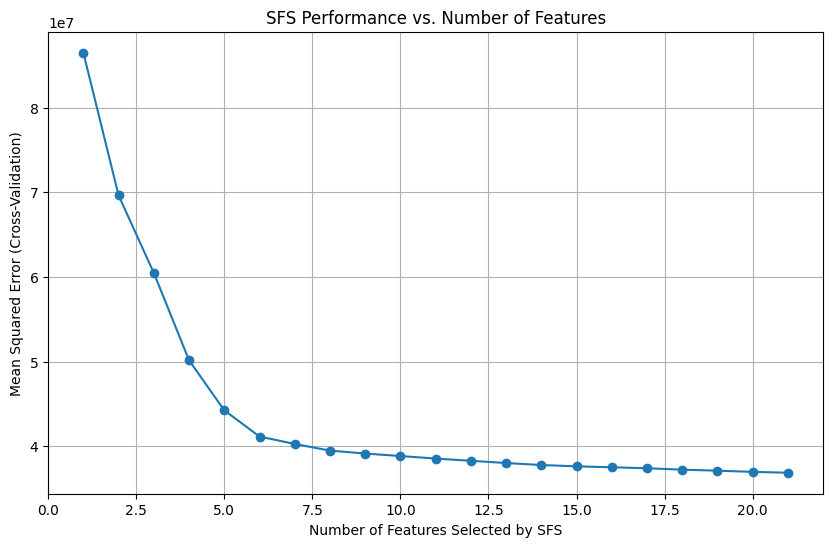

Optimal number of features based on minimum MSE: 21


In [52]:
# Lets explore the SFS model quality as the number of features increases
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize a Linear Regression model
lr = LinearRegression()

# Define a range for the number of features to select
# Let's scan from 1 feature up to the total number of 21 features
n_features_range = range(1, X_train_scaled.shape[1] - 35)

# List to store the cross-validation scores
cv_scores = []

# Perform SFS and evaluate for each number of features
for n_features in n_features_range:
    sfs = SequentialFeatureSelector(lr, n_features_to_select=n_features, cv=5, n_jobs=-1)
    sfs.fit(X_train_scaled, y_train)

    # Get the indices of the selected features
    selected_feature_indices = sfs.get_support(indices=True)

    # Train and evaluate a Linear Regression model using only the selected features
    # We use cross_val_score on the training data for a robust estimate of performance (k-fold of 5 validation)
    scores = cross_val_score(lr, X_train_scaled[:, selected_feature_indices], y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

    # Append the mean negative MSE (or convert to positive MSE)
    cv_scores.append(-scores.mean())

# Plot the performance vs. number of features
plt.figure(figsize=(10, 6))
plt.plot(n_features_range, cv_scores, marker='o')
plt.xlabel("Number of Features Selected by SFS")
plt.ylabel("Mean Squared Error (Cross-Validation)")
plt.title("SFS Performance vs. Number of Features")
plt.grid(True)
plt.show()

# Find the number of features that gives the minimum MSE
optimal_n_features = n_features_range[np.argmin(cv_scores)]
print(f"Optimal number of features based on minimum MSE: {optimal_n_features}")

## <font color="red">Model Features Interpretation:

<font color="blue">A good way to gain more insight is to look at the coefficients of the Lasso model, as it performs feature selection and can show which features have the most impact on the price.

In [65]:
# Get the coefficients of the Lasso model
lasso_coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': lasso_model.coef_})

# Sort the coefficients by their absolute value to see the most impactful features
lasso_coefficients['abs_coefficient'] = abs(lasso_coefficients['coefficient'])
lasso_coefficients = lasso_coefficients.sort_values(by='abs_coefficient', ascending=False)

# Display the coefficients
display("Lasso Model Coefficients:")
display(lasso_coefficients)

'Lasso Model Coefficients:'

feature  coefficient  abs_coefficient
1                       odometer -4020.750770      4020.750770
2                            age -3925.339926      3925.339926
25                   fuel_diesel  2227.077486      2227.077486
0                      cylinders  2163.608766      2163.608766
50                    type_truck  1481.243918      1481.243918
34                     drive_fwd -1145.272030      1145.272030
49                    type_sedan -1119.295551      1119.295551
17           manufacturer_toyota   852.755767       852.755767
33                     drive_4wd   746.711291       746.711291
21                condition_good  -552.347510       552.347510
48                   type_pickup   522.663763       522.663763
20                condition_fair  -517.182539       517.182539
40                      type_SUV  -482.912447       482.912447
44                type_hatchback  -453.877929       453.877929
10            manufacturer_honda   405.571818       405.571818
14           manufacturer_nissan  -376.416358       376.416358
53            title_status_clean   372.829275       372.829275
42              type_convertible   324.031054       324.031054
22            condition_like new   312.608860       312.608860
7             manufacturer_dodge  -309.546672       309.546672
43                    type_coupe   301.528943       301.528943
30        transmission_automatic  -297.871519       297.871519
46                  type_offroad   250.961202       250.961202
54             title_status_lien   243.887590       243.887590
51                      type_van   236.661309       236.661309
8              manufacturer_ford  -235.226090       235.226090
31           transmission_manual   230.787296       230.787296
52                    type_wagon  -220.830294       220.830294
11          manufacturer_hyundai  -213.468291       213.468291
45                 type_mini-van  -179.384672       179.384672
56          title_status_salvage  -166.109518       166.109518
37                size_full-size   164.267769       164.267769
13    manufacturer_mercedes-benz   149.916254       149.916254
36                  size_compact  -146.961946       146.961946
16           manufacturer_subaru  -146.059021       146.059021
9               manufacturer_gmc   137.775210       137.775210
55          title_status_rebuilt  -135.296601       135.296601
15              manufacturer_ram   134.057398       134.057398
27                      fuel_gas  -121.751236       121.751236
24             condition_salvage  -111.930915       111.930915
5   manufacturer_count_1k_2_1p5k   -94.452596        94.452596
47                    type_other   -86.729903        86.729903
39              size_sub-compact   -75.561139        75.561139
12             manufacturer_jeep    74.587508        74.587508
23                 condition_new    73.394508        73.394508
26                 fuel_electric    68.922602        68.922602
3               manufacturer_bmw   -65.623101        65.623101
41                      type_bus   -56.012207        56.012207
6       manufacturer_count_lt_1k    45.727175        45.727175
29                    fuel_other   -38.678054        38.678054
18       manufacturer_volkswagen   -20.150956        20.150956
32            transmission_other     0.000000         0.000000
19           condition_excellent     0.000000         0.000000
4         manufacturer_chevrolet     0.000000         0.000000
38                 size_mid-size    -0.000000         0.000000
35                     drive_rwd    -0.000000         0.000000
28                   fuel_hybrid     0.000000         0.000000

## <font color="blue">Interpreting Lasso Model Coefficients: Key Price Drivers for Used Cars

The Lasso model helps us understand which features have the most significant impact on used car prices. Features with larger absolute coefficient values are considered more important predictors. Here's what the coefficients tell us:

<font color="blue">**Features that tend to INCREASE car price:**

*   **fuel_diesel**: Diesel cars tend to have a significantly higher price compared to cars with other fuel types (holding all other factors constant). This suggests a strong demand or perceived value for diesel engines in the used car market represented by this dataset.
*   **type_truck, type_offroad, type_convertible, type_pickup, type_coupe, type_van**: Several vehicle types have positive coefficients, indicating they are generally more expensive in the used market. Trucks and offroad vehicles show particularly strong positive impacts on price. Convertibles, pickups, coupes, and vans also tend to command higher prices than the baseline vehicle type (which is implicitly captured by the other type categories).
*   **title_status_lien**: Cars with a 'lien' title status have a positive coefficient. This might seem counterintuitive, but it could indicate that cars with liens are often newer or more valuable vehicles for which loans are still outstanding.
*   **drive_4wd**: Vehicles with 4-wheel drive (4WD) tend to be more expensive than those with front-wheel drive (fwd) or rear-wheel drive (rwd).
*   **cylinders**: The number of cylinders has a positive coefficient, suggesting that cars with more cylinders (often associated with larger, more powerful engines) tend to be more expensive.
*   **condition_like new, condition_new**: Cars in 'like new' or 'new' condition understandably have a positive impact on price compared to other conditions.
*   **Specific Manufacturers (manufacturer_toyota, manufacturer_honda, manufacturer_jeep, manufacturer_mercedes-benz, manufacturer_ram, manufacturer_gmc, manufacturer_bmw)**: Several manufacturers have positive coefficients, indicating that cars from these brands tend to be more expensive than the baseline manufacturer category. Toyota, Honda, Jeep, Mercedes-Benz, Ram, GMC, and BMW appear to be brands that hold their value well or are in higher demand.

<font color="blue">**Features that tend to DECREASE car price:**

*   **odometer**: The odometer reading has a negative coefficient. This is expected – as a car accumulates more mileage, its price generally decreases.
*   **age**: The age of the car also has a negative coefficient. Older cars tend to be less expensive than newer ones.
*   **drive_fwd**: Front-wheel drive (fwd) vehicles have a negative coefficient, suggesting they are generally less expensive than rwd or 4wd.
*   **condition_fair, condition_salvage, condition_good**: Cars in 'fair', 'salvage', or 'good' condition have negative coefficients compared to the baseline condition (likely 'excellent' or 'like new'), indicating lower prices.
*   **type_sedan, type_hatchback, type_wagon, type_mini-van**: Some vehicle types, like sedans, hatchbacks, wagons, and mini-vans, have negative coefficients, suggesting they are generally less expensive than the baseline vehicle type.
*   **fuel_gas**: Gas-powered cars have a negative coefficient compared to the baseline fuel type (likely diesel or electric, based on the positive coefficient of diesel).
*   **Specific Manufacturers (manufacturer_dodge, manufacturer_nissan, manufacturer_hyundai, manufacturer_subaru, manufacturer_ford, manufacturer_count_1k_2_1p5k, manufacturer_volkswagen, manufacturer_count_lt_1k)**: Several manufacturers have negative coefficients, indicating that cars from these brands or groups of brands tend to be less expensive. Dodge, Nissan, Hyundai, Subaru, Ford, and the grouped less frequent manufacturers appear to have lower average prices.

<font color="blue">**Features with Minimal Impact (Coefficients close to zero):**

Some features have coefficients very close to zero (or exactly zero due to Lasso's regularization). These features were deemed less important predictors of price by the Lasso model in the presence of other features. Examples include:

*   manufacturer_chevrolet, size_mid-size, fuel_hybrid, transmission_other, type_SUV, drive_rwd, type_other, type_bus.

The above interpretation provides actionable insights into what factors are most valued in the used car market according to this dataset and the Lasso model.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

## <font color="blue">Used Car Price Analysis Report

**Client:** Used Car Dealership

**Date:** September 17, 2025

### <font color="blue">Executive Summary

This report presents an analysis of a used car dataset to identify the key factors influencing car prices. Our goal is to provide actionable insights to help the dealership optimize their inventory and pricing strategies. Through data understanding, preparation, and modeling, we have identified several features that significantly impact used car prices, including vehicle age, mileage, condition, manufacturer, and type.

### <font color="blue">Key Findings

Based on our analysis and the Lasso model, the following features were found to be the most significant drivers of used car prices:

*   **Vehicle Age and Odometer Reading:** As expected, older cars with higher mileage tend to have lower prices. These are strong negative predictors of price.
*   **Vehicle Condition:** The condition of the car has a substantial impact on its price. Cars in 'like new' or 'new' condition command higher prices, while those in 'fair' or 'salvage' condition are significantly less expensive.
*   **Manufacturer:** The brand of the car plays a crucial role in pricing. High-end manufacturers and those with strong market demand generally have higher average prices.
*   **Vehicle Type:** The type of vehicle (e.g., truck, SUV, sedan) is a key determinant of price, with certain types like trucks and SUVs tending to be more expensive.
*   **Fuel Type and Drive Type:** Diesel vehicles and those with 4-wheel drive (4WD) tend to have higher prices.
*   **Number of Cylinders:** Cars with more cylinders (often indicating larger engines) are generally more expensive.

These findings align with common intuition about used car values and highlight the most important aspects for the dealership to consider.

### <font color="blue">Recommendations

Based on our analysis of the key price drivers, here are some recommendations for the used car dealership:

*   **Inventory Focus:** Consider stocking more diesel trucks, pickups, and SUVs, especially from manufacturers with higher positive coefficients (e.g., Toyota, Honda, Ram, GMC, BMW).
*   **Condition Matters:** Emphasize acquiring cars in 'like new' or 'new' condition, as they command significantly higher prices. Be mindful that 'fair' and 'salvage' conditions drastically reduce value.
*   **Mileage and Age are Key:** Educate buyers that lower mileage and newer cars are generally more valuable, which aligns with the negative impact of 'odometer' and 'age' on price.
*   **Highlight Desirable Features:** When marketing cars, highlight features with positive price impacts like 4WD, higher cylinder counts, and desirable body types.
*   **Pricing Strategy:** Use the insights from the coefficients to inform pricing strategies for different makes, models (implicitly captured by manufacturer and type), conditions, and mileages.